In [218]:
! pip install chefboost
! pip install category_encoders

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from chefboost import Chefboost as chef
from chefboost.training import Training
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time

# EDA for four datasets

## German Credit Data

In [4]:
credit_df = pd.read_csv('german_credit_data.csv')

In [221]:
credit_df.shape

(1000, 11)

In [5]:
credit_df.drop("Unnamed: 0", inplace=True, axis=1)
credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [223]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [224]:
credit_df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [225]:
credit_df[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']].describe()

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


In [226]:
#No duplicates
credit_df.duplicated().sum()

0

In [227]:
credit_df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

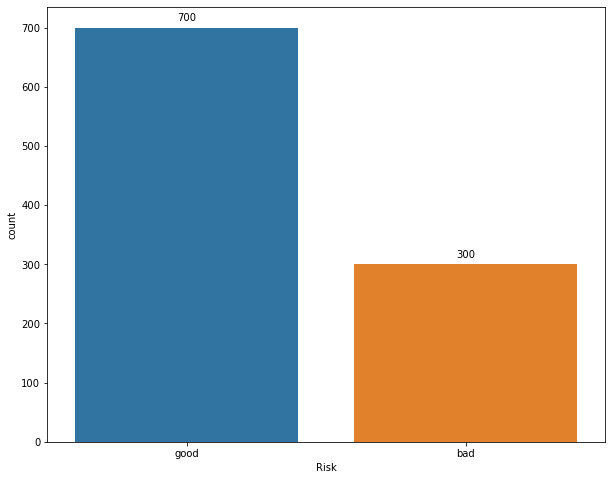

In [228]:
# Check for classes balance
plt.figure(figsize=(10, 8))
y_countplot = sns.countplot(x='Risk', data=credit_df)
# To add annotation to counter plot https://github.com/mwaskom/seaborn/issues/1582
for y in y_countplot.patches:
    y_countplot.annotate(format(y.get_height()), (y.get_x() + y.get_width() / 2., y.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')
plt.show()

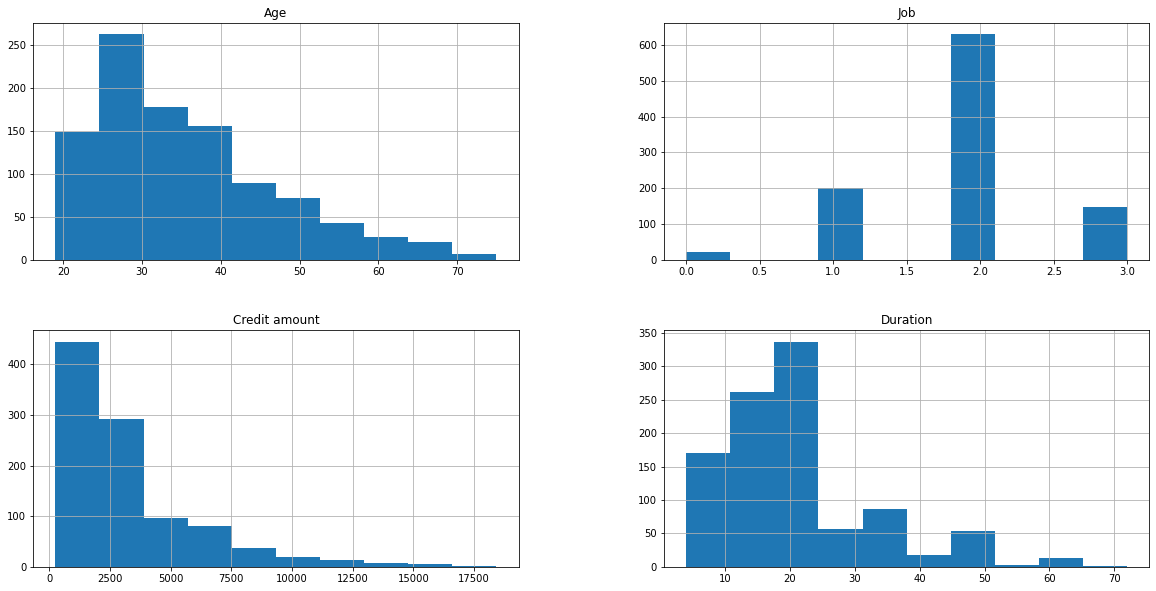

In [229]:
credit_df.hist(figsize=(20, 10))
plt.show()

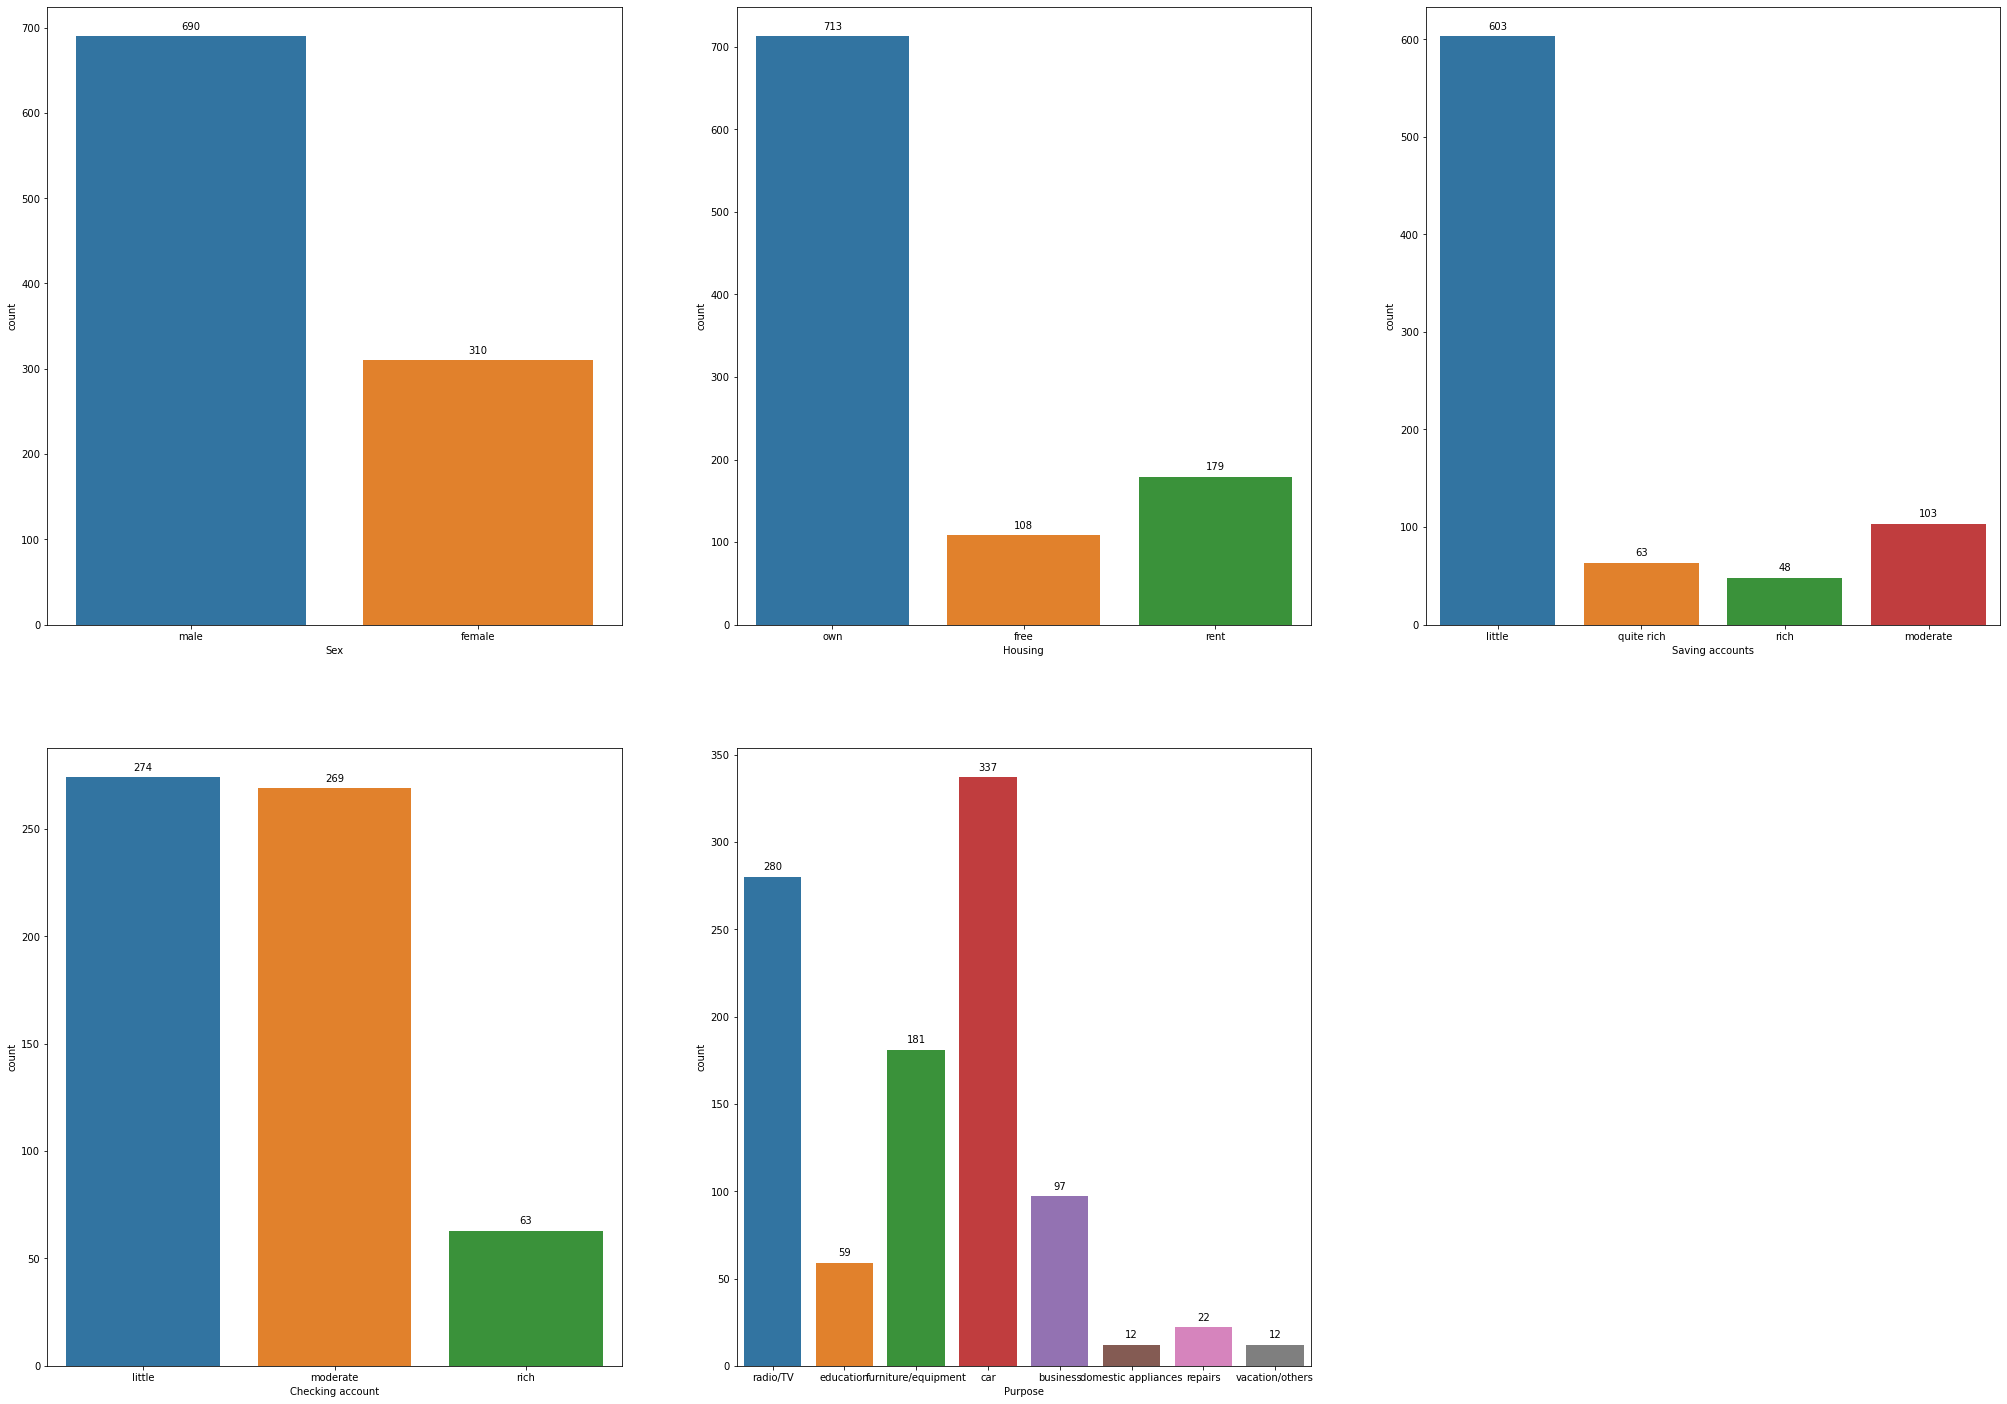

In [230]:
# Categorical features count
plt.figure(figsize=(35, 25))
j = 1
for i in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']:
    plt.subplot(2, 3, j)
    plot = sns.countplot(x=i, data=credit_df)
    # To add annotation to counter plot https://github.com/mwaskom/seaborn/issues/1582
    for z in plot.patches:
        plot.annotate(format(z.get_height()), (z.get_x() + z.get_width() / 2.,z.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 10), textcoords= 'offset points')
    j += 1
#plt.tight_layout()

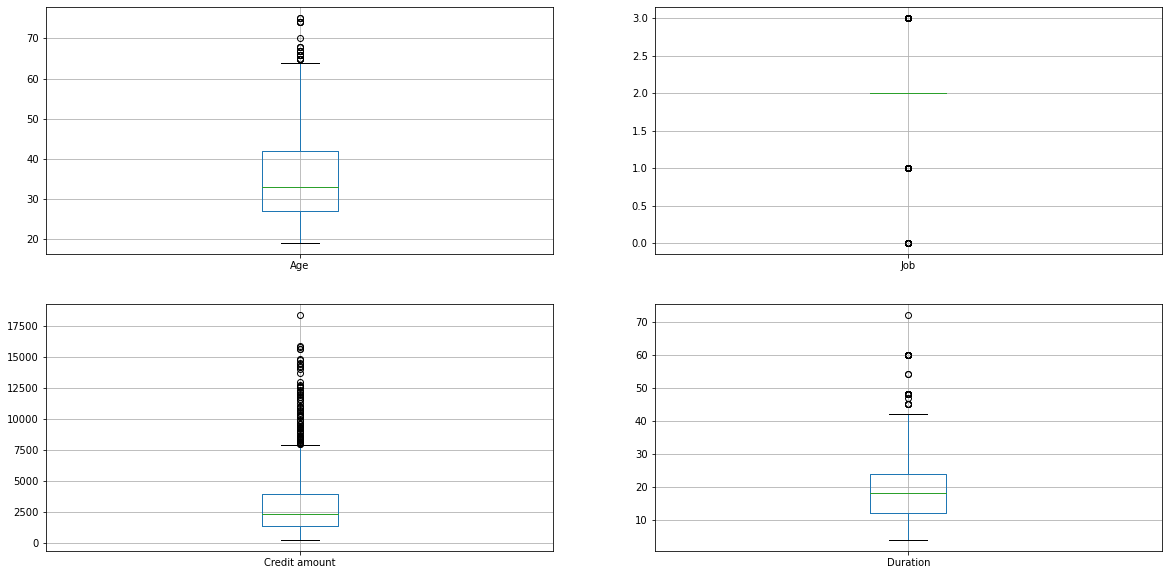

In [231]:
# Numerical feature boxplot
plt.figure(figsize=(20, 10))
j = 1
for i in ['Age', 'Job', 'Credit amount', 'Duration']:
    plt.subplot(2, 2, j)
    credit_df.boxplot([i])
    j += 1
plt.show()

## Red Wine Quality Dataset

In [232]:
wine_df = pd.read_csv("winequality-red.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [233]:
wine_df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

There are 12 variables in this dataset. The quality variable is the dependent variable.

In [234]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [235]:
wine_df.isnull().sum() # there are no null variables in this dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

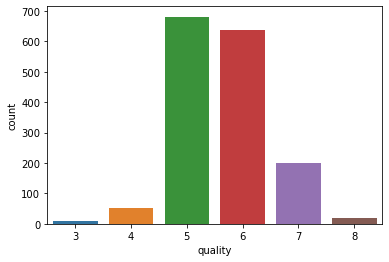

In [236]:
sns.countplot(x = 'quality',data = wine_df) # This dataset is unbalanced

<AxesSubplot:>

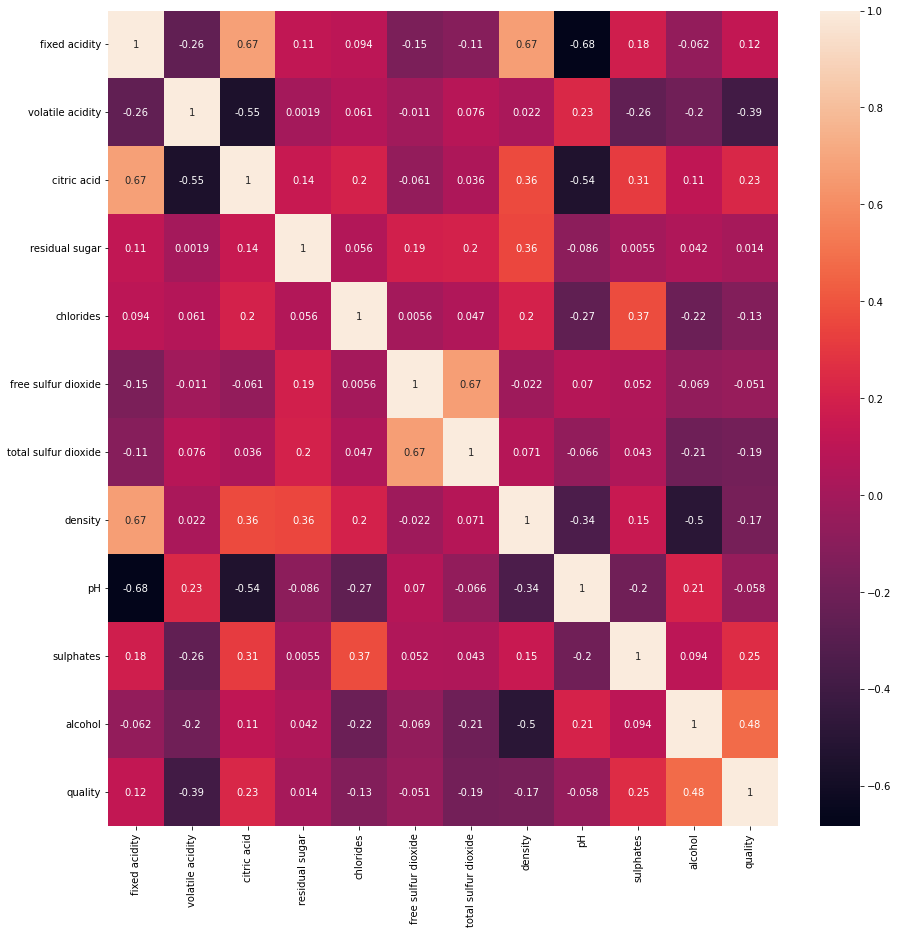

In [237]:
plt.figure(figsize = (15, 15))
sns.heatmap(wine_df.corr(), annot = True)

Fixed acidity, citric acid, residual sugar, sulphates, and alcohol have positive correlation with quality of the red wine. Volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, density, and pH have negative correlation with quality of the red wine. Alcohol has the strongest correlation and volatile acidity has the weakest correlation. 

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

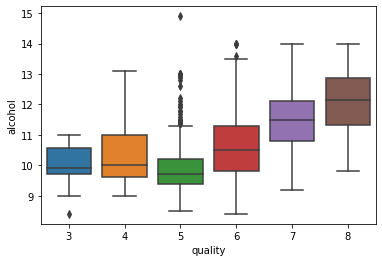

In [238]:
sns.boxplot(x='quality', y='alcohol', data = wine_df) 
# a box plot between alcohol concentration and the quality of red wine

Most of the outliers are around wine with quality 5 and 6.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

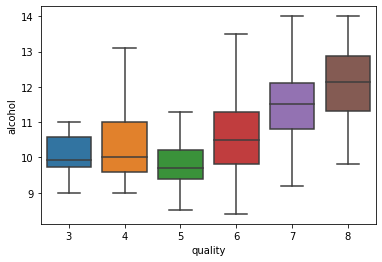

In [239]:
sns.boxplot(x='quality', y='alcohol', data = wine_df, showfliers = False) # removing the outliers

This shows that the higher the alcohol concentration, the higher the quality of the red wine. 

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

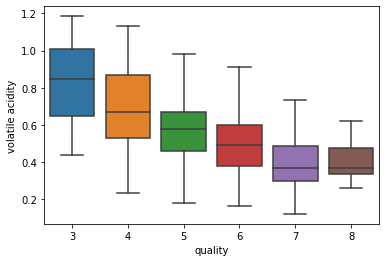

In [240]:
sns.boxplot(x='quality', y='volatile acidity', data = wine_df, showfliers = False)
# a box plot between volatile acidity and the quality of red wine

This shows that the lower the volatile acidity, the lower the quality of the red wine. 

## Adult Income Dataset

In [241]:
adult_df = pd.read_csv('adult.csv')
adult_df.shape

(48842, 15)

In [242]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [243]:
#no null values but we can see that some values have ? instead of being null
adult_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#fnlwgt: final weight, the number of people the census believes the entry represents

In [244]:
#replace ? with Null
adult_df = adult_df.replace({'?': None})

In [245]:
#since the target varaible and most columns have zero null values, we will keep rows with missing values for now
adult_df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [246]:
adult_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
income,,,,,,,,,,,,,,
<=50K,37155,34621,37155,37155,37155,37155,34611,37155,37155,37155,37155,37155,37155,36518
>50K,11687,11422,11687,11687,11687,11687,11422,11687,11687,11687,11687,11687,11687,11467


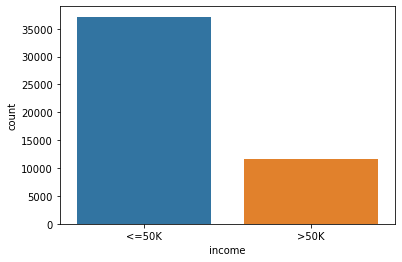

In [247]:
#target variable is imbalanced, 37155 of observations have <=50K income, whereas only 11687 of obervations have >50K income 
sns.countplot(x = 'income',data = adult_df)
adult_df.groupby(['income']).count()

In [248]:
#we see that average age and hours-per-week for people with higher income is bigger than those with lower income
adult_df.groupby(['income']).mean()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
income,,,,,,
<=50K,36.872184,190039.565523,9.598493,147.010308,54.151931,38.840048
>50K,44.275178,188470.574570,11.602807,4042.239497,193.528964,45.452896


<AxesSubplot:>

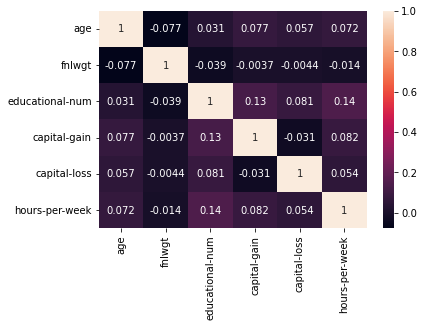

In [249]:
#there is almost no correlation between the numerical variables 
sns.heatmap(adult_df.corr(), annot = True)

Text(0.5, 1.0, 'Age Distribution')

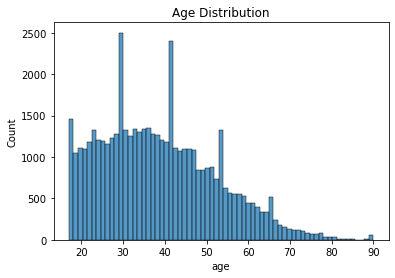

In [250]:
sns.histplot(adult_df['age']).set_title('Age Distribution')

<AxesSubplot:xlabel='race', ylabel='count'>

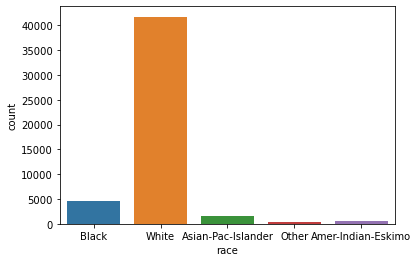

In [251]:
#mostly white 
sns.countplot(x = 'race',data = adult_df)

<AxesSubplot:xlabel='marital-status', ylabel='count'>

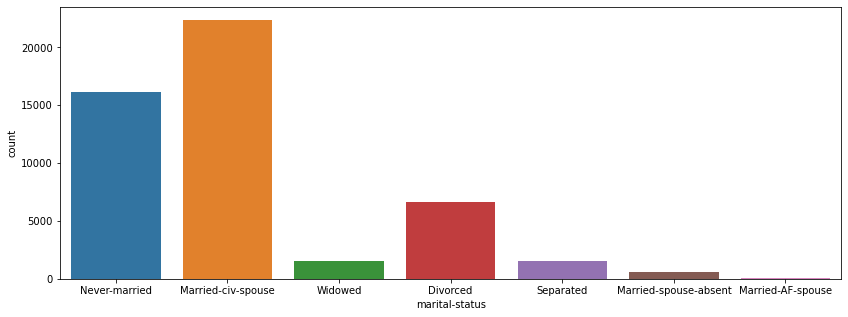

In [252]:
#marital status
plt.figure(figsize = (14, 5))
sns.countplot(x = 'marital-status',data = adult_df)

## First Artificial Dataset

Below is the plot of first two features. This artificial dataset is generated by clusters. So it should be easily classified using decision tree.

Text(0.5, 1.0, 'centers = 1')

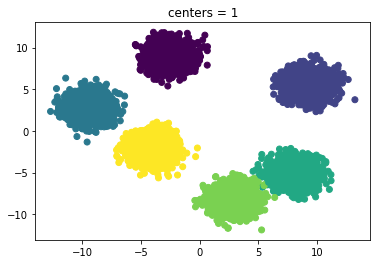

In [253]:
X_first_Artificial, y_first_Artificial = make_blobs(n_samples=10000, centers=6, n_features=50, random_state=42)
plt.figure()
plt.scatter(X_first_Artificial[:, 0], X_first_Artificial[:, 1], c=y_first_Artificial)
plt.title('centers = 1')

In [254]:
First_Artificial_df = pd.DataFrame(X_first_Artificial,columns = ['1','2','3','4','5','6','7','8','9','10',
                                                                 '11','12','13','14','15','16','17','18','19','20',
                                                                 '21','22','23','24','25','26','27','28','29','30',
                                                                '31','32','33','34','35','36','37','38','39','40',
                                                                '41','42','43','44','45','46','47','48','49','50'])
First_Artificial_df['Target'] = y_first_Artificial
First_Artificial_df = First_Artificial_df.astype({'Target': str})
First_Artificial_df

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,Target
0,1.854219,-9.060577,-7.232399,7.227770,2.572563,-8.730482,-8.234146,2.511572,-9.501312,-7.471581,...,9.323758,7.489954,-4.160673,-9.704390,8.573475,-1.526214,8.851264,9.613553,7.679215,4
1,9.939457,6.778171,6.626757,7.540728,1.737359,10.220870,-7.704547,-7.651377,-8.560570,-2.308869,...,3.626161,5.001714,2.124524,4.688919,-2.002352,-0.483564,-2.042922,-10.853955,-7.429156,1
2,-2.890680,8.273078,5.869009,1.480427,-7.406035,-7.009404,-7.413813,8.454689,1.627452,5.388237,...,0.737992,-10.574369,8.987061,-5.768191,2.901303,-3.578547,0.756729,0.999648,-6.904023,0
3,-10.904661,2.020141,-3.994983,-0.336483,8.675776,-5.841990,-2.059752,5.727782,-5.066964,-8.254719,...,-3.701461,-0.569896,-4.114273,-5.685315,-9.449179,2.647983,-0.741426,-6.773020,-3.246508,2
4,-9.043613,3.969191,-3.873651,-0.368633,6.702187,-6.097934,-1.724966,4.614626,-4.072308,-8.463715,...,-7.120681,1.733112,-3.172827,-3.424101,-7.519322,2.917195,0.601631,-8.920533,-4.882397,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-3.298360,-2.218802,7.650568,-3.798930,-4.968472,0.674801,9.891845,3.108257,2.770372,-7.872692,...,-9.476315,6.972136,-1.616442,-6.148266,1.807619,4.269969,-4.799725,1.808289,-8.228015,5
9996,2.404995,-11.688830,-7.976660,9.190847,1.092916,-11.408768,-7.207712,4.212871,-10.141461,-4.546530,...,9.247690,8.923760,-1.036454,-10.910371,8.664794,-2.204789,10.145391,9.848158,7.734300,4
9997,8.890477,6.413765,9.917613,8.037167,1.768751,7.957030,-9.710832,-6.805011,-7.649407,-3.452350,...,2.564628,6.054286,1.128983,4.971394,0.532394,3.089073,-1.410564,-8.384327,-7.998574,1
9998,7.501087,-5.717805,-7.510483,2.016763,10.128403,-5.662872,3.723761,5.927484,-4.815790,3.531143,...,8.028043,8.001702,2.931943,-3.222410,-3.044454,4.482912,8.802346,8.094691,4.703666,3


## Second Artificial Dataset

This artificial dataset has the same sample size and number of features. However, there are only 45 useful informative features, and remaining 5 features are redundant which means they are linear combination of other features. In addition, there are 5% percent of the data whose class is randomly assigned, so there exists nosiy data. Finally, I make the shift = 1, which means shift features by 1 each time so the range of each features varies. Details referred to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification

Text(0.5, 1.0, 'centers = 1')

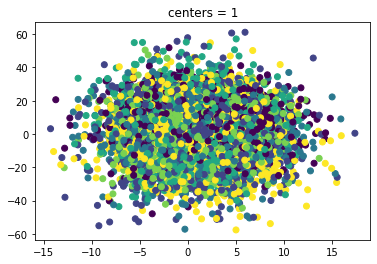

In [255]:
X_sec_Artificial,y_sec_Artificial = make_classification(n_samples = 10000, n_features = 50, n_informative = 45, n_redundant = 5, n_repeated = 0, n_classes = 6,
                                                        n_clusters_per_class = 2, flip_y = 0.05, shift = 1, random_state = 42)
plt.figure()
plt.scatter(X_sec_Artificial[:, 0], X_sec_Artificial[:, 1], c=y_sec_Artificial)
plt.title('centers = 1')

In [256]:
Sec_Artificial_df = pd.DataFrame(X_sec_Artificial,columns = ['1','2','3','4','5','6','7','8','9','10',
                                                                 '11','12','13','14','15','16','17','18','19','20',
                                                                 '21','22','23','24','25','26','27','28','29','30',
                                                                '31','32','33','34','35','36','37','38','39','40',
                                                                '41','42','43','44','45','46','47','48','49','50'])
Sec_Artificial_df['Target'] = y_sec_Artificial
Sec_Artificial_df = Sec_Artificial_df.astype({'Target': str})
Sec_Artificial_df

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,Target
0,0.142372,32.657288,-7.730448,4.720582,1.568258,2.442761,-5.157877,6.716322,2.629221,5.684133,...,-2.458382,0.333226,2.951268,-2.972412,-3.706380,7.316846,8.735795,-5.489070,-4.914978,3
1,-2.896494,-12.510719,2.946461,-2.668396,-0.916305,-0.200334,-1.743985,3.699803,1.157818,-1.296849,...,1.498790,0.056741,0.282126,-0.087357,1.906403,3.332812,-1.338653,1.961578,-0.152210,4
2,0.460402,-8.905278,-1.459329,10.314049,-8.029972,0.952764,3.177931,0.552431,4.700898,-4.111621,...,-1.126098,0.018442,-7.940069,-2.379509,9.708477,2.935679,0.990688,5.356984,-4.454972,3
3,-4.089833,-5.590670,6.458277,1.337546,-0.796803,-2.234344,4.424185,1.359940,2.527629,-6.601302,...,6.303319,0.135782,-4.201287,1.495373,-1.308058,0.652483,1.597269,3.120452,-4.842632,1
4,2.650668,-8.724004,-2.215812,4.123960,4.956644,-0.742299,5.031477,6.396224,-2.342482,-0.834182,...,1.524804,0.277295,0.661463,4.958045,-0.386429,5.735642,3.811054,0.731921,2.344960,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.100735,15.213364,5.007623,-0.830010,7.672774,2.355998,-3.455195,6.957364,2.364012,-1.447949,...,0.381977,1.778054,-5.518729,0.189646,5.517031,2.921632,6.155448,3.960628,0.596587,2
9996,-5.561415,-12.735165,-0.478836,-0.179195,4.838815,-2.575770,-3.031419,1.560054,0.946963,-2.940964,...,5.277907,0.949151,0.661492,1.844777,-0.908655,-2.014638,1.295149,-0.759301,-0.098660,0
9997,2.293387,0.643975,4.390060,2.035321,-6.289045,7.044275,0.652907,0.624932,-2.940570,-3.411253,...,0.711627,-2.065676,-0.998032,0.451014,5.997824,1.828278,2.586465,-0.991920,2.510131,1
9998,7.082020,-13.758995,4.209430,4.613442,2.037272,-1.826698,4.832830,-4.439513,-1.451344,-2.721861,...,0.486363,8.394068,-2.682590,-9.243019,5.381615,2.910121,3.595655,-2.280110,1.252699,2


# Algorithm Implementation Starts Here

## ID3

### A. German Credit Dataset

In [257]:
credit_df_ID3_1 = credit_df.copy()
credit_df_ID3_2 = credit_df.copy()
credit_df_ID3_3 = credit_df.copy()

#### 1. Build ID3 model with null values

In [258]:
config = {'algorithm': 'ID3'}
credit_model_no_bin = chef.fit(credit_df_ID3_1, config = config, target_label = 'Risk')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  11.382013320922852  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  89.4 % on  1000  instances
Labels:  ['good' 'bad']
Confusion matrix:  [[673, 79], [27, 221]]
Precision:  89.4947 %, Recall:  96.1429 %, F1:  92.6998 %


In [259]:
credit_df_ID3_1['Saving accounts'] = credit_df_ID3_1['Saving accounts'].fillna('no_inf')
credit_df_ID3_1['Checking account'] = credit_df_ID3_1['Checking account'].fillna('no_inf')
config = {'algorithm': 'ID3'}
credit_model_no_bin = chef.fit(credit_df_ID3_1, config = config, target_label = 'Risk')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  10.674854755401611  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  91.7 % on  1000  instances
Labels:  ['good' 'bad']
Confusion matrix:  [[679, 62], [21, 238]]
Precision:  91.6329 %, Recall:  97.0 %, F1:  94.2401 %


#### 2. Build ID3 model with no binning (treat continuous variables as categorical variables)

In [260]:
# Fill NaN 
credit_df_ID3_2['Saving accounts'] = credit_df_ID3_2['Saving accounts'].fillna('no_inf')
credit_df_ID3_2['Checking account'] = credit_df_ID3_2['Checking account'].fillna('no_inf')
# Change to String type
credit_df_ID3_2.Age = credit_df_ID3_2.Age.astype(str)
credit_df_ID3_2.Job = credit_df_ID3_2.Job.astype(str)
credit_df_ID3_2.Duration = credit_df_ID3_2.Duration.astype(str)
credit_df_ID3_2['Credit amount'] = credit_df_ID3_2['Credit amount'].astype(str)

In [261]:
# Train Test Split
credit_df_X = credit_df_ID3_2.drop("Risk", axis = 1)
credit_df_Y = credit_df_ID3_2["Risk"]
credit_df_X_train, credit_df_X_test, credit_df_y_train, credit_df_y_test = train_test_split(credit_df_X, credit_df_Y, test_size=.2, random_state = 31)

In [262]:
credit_df_train = pd.concat([credit_df_X_train, pd.DataFrame(credit_df_y_train)], axis=1)

In [263]:
config = {'algorithm': 'ID3'}
credit_model_ID3_2 = chef.fit(credit_df_train, config = config, target_label = 'Risk')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  51.006922006607056  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  800  instances
Labels:  ['bad' 'good']
Confusion matrix:  [[235, 0], [0, 565]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [264]:
credit_df_train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
545,43,male,2,free,little,little,1333,24,car,bad
215,39,female,1,own,no_inf,moderate,932,6,education,good
589,60,male,2,own,little,little,2246,12,furniture/equipment,bad
582,26,female,2,rent,little,no_inf,1388,9,furniture/equipment,good
544,61,male,1,own,little,no_inf,1255,12,car,good
...,...,...,...,...,...,...,...,...,...,...
610,22,female,2,own,moderate,little,741,12,domestic appliances,bad
894,29,male,2,own,no_inf,no_inf,1169,18,radio/TV,good
16,53,male,2,own,no_inf,no_inf,2424,24,radio/TV,good
599,32,male,2,free,little,no_inf,3863,24,business,good


In [265]:
credit_df_test_list = credit_df_X_test.values.tolist()
credit_df_test_pre = []
for item in credit_df_test_list:
    credit_df_test_pre.append(chef.predict(credit_model_ID3_2, item))

In [266]:
correct = 0
for i in range(0,200):
    if credit_df_test_pre[i] == list(credit_df_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/200)*100)+"%.")

The accuracy for the test dataset is 35.0%.


#### 3. Build ID3 model with binning & Binning the continuos variables age, credit amount and duration

In [267]:
def quantile_bin_label(dataframe, column):
    q_25 = np.percentile(dataframe[dataframe[column] >= 0][column], 25, interpolation = 'midpoint')
    q_50 = np.percentile(dataframe[dataframe[column] >= 0][column], 50, interpolation = 'midpoint')
    q_75 = np.percentile(dataframe[dataframe[column] >= 0][column], 75, interpolation = 'midpoint')
    q_100 = np.percentile(dataframe[dataframe[column] >= 0][column], 100, interpolation = 'midpoint')
    label_column = []
    q_list = list(dataframe[column])
    del dataframe[column]
    for item in q_list:
        if item < q_25:
            label_column.append("1")
        elif item >= q_25 and item < q_50:
            label_column.append("2")
        elif item >= q_50 and item < q_75:
            label_column.append("3")
        else:
            label_column.append("4")
    dataframe[column] = label_column

In [268]:
age_list = []
for age in credit_df_ID3_3.Age:
    if age >= 19 and age < 24:
        age_list.append("1")
    elif age >= 24 and age < 34:
        age_list.append("2")
    elif age >= 34 and age < 44:
        age_list.append("3")
    elif age >= 44 and age < 64:
        age_list.append("4")
    else:
        age_list.append("5")
credit_df_ID3_3.drop("Age", inplace = True, axis =1)
credit_df_ID3_3["Age_1"] = age_list

In [269]:
for column in ["Credit amount", "Duration"]:
    quantile_bin_label(credit_df_ID3_3, column)
credit_df_ID3_3.Job = credit_df_ID3_3.Job.astype(str)
credit_df_ID3_3['Saving accounts'] = credit_df_ID3_3['Saving accounts'].fillna('no_inf')
credit_df_ID3_3['Checking account'] = credit_df_ID3_3['Checking account'].fillna('no_inf')

In [270]:
credit_df_X = credit_df_ID3_3.drop("Risk", axis = 1)
credit_df_Y = credit_df_ID3_3["Risk"]
credit_df_X_train, credit_df_X_test, credit_df_y_train, credit_df_y_test = train_test_split(credit_df_X, credit_df_Y, test_size=.2, random_state = 12345)


In [271]:
credit_df_train = pd.concat([credit_df_X_train, pd.DataFrame(credit_df_y_train)], axis=1)

In [272]:
credit_df_train

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Age_1,Credit amount,Duration,Risk
839,male,2,own,little,no_inf,radio/TV,4,3,4,good
195,female,3,own,little,moderate,education,3,2,1,bad
581,male,1,own,little,moderate,car,4,3,2,good
695,male,2,rent,quite rich,no_inf,car,4,1,1,good
35,male,1,own,little,moderate,radio/TV,2,4,4,bad
...,...,...,...,...,...,...,...,...,...,...
420,female,2,rent,rich,no_inf,car,1,3,2,good
129,female,2,own,little,little,car,2,3,2,bad
285,female,1,own,little,little,car,3,4,4,good
485,male,3,own,little,moderate,car,4,1,1,bad


In [273]:
config = {'algorithm': 'ID3'}
credit_model_ID3_3 = chef.fit(credit_df_train, config = config, target_label = 'Risk')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  39.200456857681274  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  98.25 % on  800  instances
Labels:  ['good' 'bad']
Confusion matrix:  [[548, 8], [6, 238]]
Precision:  98.5612 %, Recall:  98.917 %, F1:  98.7388 %


In [274]:
credit_df_test_list = credit_df_X_test.values.tolist()
credit_df_test_pre = []
for item in credit_df_test_list:
    credit_df_test_pre.append(chef.predict(credit_model_ID3_3, item))

In [275]:
correct = 0
for i in range(0,200):
    if credit_df_test_pre[i] ==list(credit_df_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/200)*100)+"%.")

The accuracy for the test dataset is 67.5%.


### B. Wine Quality Dataset

In [276]:
wine_df_ID3_1 = wine_df.copy()
wine_df_ID3_2 = wine_df.copy()

#### 1. Build the ID3 model without any binnings and treat target variable as 6 categories

In [277]:
wine_df_ID3_1 = wine_df_ID3_1.astype(str)
wine_df_X = wine_df_ID3_1.drop("quality", axis = 1)
wine_df_Y = wine_df_ID3_1["quality"]
wine_df_X_train, wine_df_X_test, wine_df_y_train, wine_df_y_test = train_test_split(wine_df_X, wine_df_Y, test_size=.2, random_state = 42)


In [278]:
wine_df_train = pd.concat([wine_df_X_train, pd.DataFrame(wine_df_y_train)], axis=1)

In [279]:
config = {'algorithm': 'ID3'}
wine_model_train = chef.fit(wine_df_train, config = config, target_label = 'quality')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  87.7695689201355  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  1279  instances
Labels:  ['6' '5' '4' '7' '8' '3']
Confusion matrix:  [[506, 0, 0, 0, 0, 0], [0, 551, 0, 0, 0, 0], [0, 0, 43, 0, 0, 0], [0, 0, 0, 157, 0, 0], [0, 0, 0, 0, 13, 0], [0, 0, 0, 0, 0, 9]]
Decision  6  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  5  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  4  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  7  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  8  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  3  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [280]:
wine_test_list = wine_df_X_test.values.tolist()
wine_test_pre = []
for item in wine_test_list:
    wine_test_pre.append(chef.predict(wine_model_train, item))

In [281]:
correct = 0
for i in range(0,320):
    if wine_test_pre[i] ==list(wine_df_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/320)*100)+"%.")

The accuracy for the test dataset is 51.24999999999999%.


#### 2. Binning all continuous columns

In [282]:
wine_df_ID3_2.quality = wine_df_ID3_2.quality.astype(str)
for item in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    quantile_bin_label(wine_df_ID3_2, item)

In [283]:
wine_df_X_2 = wine_df_ID3_2.drop("quality", axis = 1)
wine_df_Y_2 = wine_df_ID3_2["quality"]
wine_df_X_train_2, wine_df_X_test_2, wine_df_y_train_2, wine_df_y_test_2 = train_test_split(wine_df_X_2, wine_df_Y_2, test_size=.2, random_state = 42)


In [284]:
wine_df_train_2 = pd.concat([wine_df_X_train_2, pd.DataFrame(wine_df_y_train_2)], axis=1)

In [285]:
config = {'algorithm': 'ID3'}
wine_model_train_2 = chef.fit(wine_df_train_2, config = config, target_label = 'quality')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  77.65345597267151  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  99.29632525410477 % on  1279  instances
Labels:  ['6' '5' '4' '7' '8' '3']
Confusion matrix:  [[505, 5, 1, 0, 0, 0], [0, 546, 0, 1, 0, 0], [1, 0, 41, 0, 0, 0], [0, 0, 0, 156, 0, 0], [0, 0, 0, 0, 13, 0], [0, 0, 1, 0, 0, 9]]
Decision  6  => Accuray:  99.4527 %, Precision:  98.8258 %, Recall:  99.8024 %, F1:  99.3117 %
Decision  5  => Accuray:  99.5309 %, Precision:  99.8172 %, Recall:  99.0926 %, F1:  99.4536 %
Decision  4  => Accuray:  99.7654 %, Precision:  97.619 %, Recall:  95.3488 %, F1:  96.4705 %
Decision  7  => Accuray:  99.9218 %, Precision:  100.0 %, Recall:  99.3631 %, F1:  99.6805 %
Decision  8  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  3  => Accuray:  99.9218 %, Precision:  90.0 %, Recall:  100.0

In [286]:
wine_test_list_2 = wine_df_X_test_2.values.tolist()
wine_test_pre_2 = []
for item in wine_test_list_2:
    wine_test_pre_2.append(chef.predict(wine_model_train_2, item))

In [287]:
correct = 0
for i in range(0,320):
    if wine_test_pre_2[i] ==list(wine_df_y_test_2)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/320)*100)+"%.")

The accuracy for the test dataset is 57.1875%.


### C. Adult Income Dataset

In [288]:
adult_df_ID3_1 = adult_df.copy()

In [289]:
adult_df_ID3_sample = adult_df_ID3_1.sample(n=10000, random_state = 42)

In [290]:
for item in ["age","fnlwgt","educational-num","capital-gain","capital-loss","hours-per-week"]:
    quantile_bin_label(adult_df_ID3_sample, item)

In [291]:
adult_df_X = adult_df_ID3_sample.drop("income", axis = 1)
adult_df_Y = adult_df_ID3_sample["income"]
adult_df_X_train, adult_df_X_test, adult_df_y_train, adult_df_y_test = train_test_split(adult_df_X, adult_df_Y, test_size=.2, random_state = 42)


In [292]:
adult_df_train = pd.concat([adult_df_X_train, pd.DataFrame(adult_df_y_train)], axis=1)

In [293]:
config = {'algorithm': 'ID3'}
adult_df_model_train = chef.fit(adult_df_train, config = config, target_label = 'income')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  505.7288239002228  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  94.0375 % on  8000  instances
Labels:  ['<=50K' '>50K']
Confusion matrix:  [[5816, 181], [296, 1707]]
Precision:  96.9818 %, Recall:  95.1571 %, F1:  96.0608 %


In [294]:
adult_df_test_list = adult_df_X_test.values.tolist()
adult_df_test_pre = []
for item in adult_df_test_list:
    adult_df_test_pre.append(chef.predict(adult_df_model_train, item))

In [295]:
correct = 0
for i in range(0,2000):
    if adult_df_test_pre[i] ==list(adult_df_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/2000)*100)+"%.")

The accuracy for the test dataset is 76.25%.


### D. First Artificial Dataset

In [296]:
First_Artificial_df_ID3_1 = First_Artificial_df.copy()
First_Artificial_df_ID3_2 = First_Artificial_df.copy()

#### 1. Build model with train test split

In [297]:
ID3_X_1 = First_Artificial_df_ID3_1.drop("Target", axis = 1)
ID3_Y_1 = First_Artificial_df_ID3_1["Target"]
ID3_X_train_1, ID3_X_test_1, ID3_y_train_1, ID3_y_test_1 = train_test_split(ID3_X_1, ID3_Y_1, test_size=.2, random_state = 42)


In [298]:
first_train_ID3_1 = pd.concat([ID3_X_train_1, pd.DataFrame(ID3_y_train_1)], axis=1)

In [299]:
first_train_ID3_1

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,Target
9254,8.740138,6.146120,9.997484,8.298634,2.792738,10.227104,-7.332350,-6.807670,-8.955816,-3.825117,...,2.868457,6.230701,1.890252,6.584548,-1.246828,0.873370,-0.568394,-9.036377,-7.218649,1
1561,-8.419490,2.916682,-5.543217,-2.013176,10.118412,-4.963379,-2.511245,4.491285,-4.775482,-9.129216,...,-4.418432,0.210811,-2.850732,-3.011637,-7.178658,2.953805,-0.547347,-9.961416,-4.175320,2
1670,-1.784541,9.522434,5.526981,3.341000,-6.341740,-7.294917,-8.723478,8.983420,4.786749,4.624548,...,-0.412983,-9.939170,7.713591,-3.421367,4.912944,-1.970800,1.491481,1.400477,-7.735196,0
6087,3.100765,-7.888990,-7.751596,9.878629,1.673534,-9.808729,-9.066254,4.043975,-9.715771,-6.595757,...,11.360003,8.804300,-2.928333,-10.444184,8.824100,-3.204947,9.008448,9.031925,4.462955,4
6669,-1.562860,8.456377,4.719140,1.020138,-4.674117,-8.675982,-8.699686,6.964921,2.040642,3.840836,...,-2.105577,-9.464202,8.077955,-5.911840,3.094453,-5.405208,-0.182819,0.665723,-6.308105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,9.972481,3.953744,9.301250,7.149262,2.559720,5.941475,-8.465293,-5.860014,-9.548691,-3.408505,...,3.142822,3.758722,1.586983,5.376902,0.578198,1.747221,-1.928094,-8.747432,-9.482177,1
5191,-9.042689,3.464673,-3.644732,2.049987,8.861654,-4.299565,-2.352514,6.351730,-4.182281,-7.702221,...,-3.537569,-0.010192,-2.907581,-5.738069,-9.468063,2.467169,0.768677,-11.185957,-2.940876,2
5390,-3.091739,-2.049623,4.568776,-3.310137,-6.056978,2.026112,8.822080,2.201516,0.684234,-9.377700,...,-9.165781,5.648458,-2.422239,-6.486998,-0.462542,3.674784,-4.292552,2.655031,-9.260576,5
860,7.101281,-4.818381,-5.689325,0.218351,8.761723,-4.416152,3.308386,6.132465,-6.339079,3.997566,...,7.483691,7.829529,4.001956,-1.998930,-3.396750,3.978734,8.324064,7.087731,6.945805,3


In [300]:
config = {'algorithm': 'ID3'}
first_model_train_ID3_1 = chef.fit(first_train_ID3_1, config = config, target_label = 'Target')
chef.save_model(first_model_train_ID3_1, "first_model_train_ID3_1.pkl")

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  3.891901969909668  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  8000  instances
Labels:  ['1' '2' '0' '4' '5' '3']
Confusion matrix:  [[1327, 0, 0, 0, 0, 0], [0, 1315, 0, 0, 0, 0], [0, 0, 1344, 0, 0, 0], [0, 0, 0, 1362, 0, 0], [0, 0, 0, 0, 1344, 0], [0, 0, 0, 0, 0, 1308]]
Decision  1  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  2  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  0  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  4  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  5  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  3  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [301]:
first_test_list_ID3_1 = ID3_X_test_1.values.tolist()
first_test_pre = []
for item in first_test_list_ID3_1:
    first_test_pre.append(chef.predict(first_model_train_ID3_1, item))

In [302]:
correct = 0
for i in range(0,2000):
    if first_test_pre[i] ==list(ID3_y_test_1)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/2000)*100)+"%.")

The accuracy for the test dataset is 100.0%.


#### 2. Train the whole dataset with increasing features

In [303]:
temp = ['Target']
for i in range(1,51):
    temp.append(str(i))
    first_model_train_ID3_2 = chef.fit(First_Artificial_df_ID3_2[temp], config = config, target_label = 'Target')

['1', 'Decision']
[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  0.24749302864074707  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  33.34 % on  10000  instances
Labels:  ['4' '1' '0' '2' '5' '3']
Confusion matrix:  [[0, 0, 0, 0, 0, 0], [1640, 1667, 0, 0, 0, 1667], [26, 0, 1667, 1667, 1666, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
Decision  4  => Accuray:  83.34 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
Decision  1  => Accuray:  66.93 %, Precision:  33.5143 %, Recall:  100.0 %, F1:  50.2033 %
Decision  0  => Accuray:  66.41 %, Precision:  33.1675 %, Recall:  100.0 %, F1:  49.8132 %
Decision  2  => Accuray:  83.33 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
Decision  5  => Accuray:  83.34 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
Decision  3  => Accuray:  83.33 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
['1', '2'

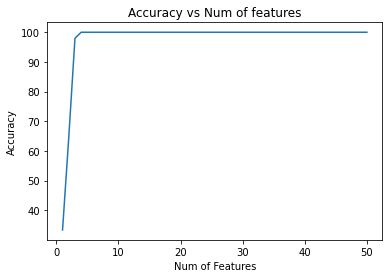

In [304]:
accuracy_list = [33.34, 64.49, 97.96, 100, 100, 100, 100, 100, 100, 100, 
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
num_features = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,20,
               21,22,23,24,25,26,27,28,29,30,
               31,32,33,34,35,36,37,38,39,40,
               41,42,43,44,45,46,47,48,49,50]
plt.plot(num_features, accuracy_list)
plt.title('Accuracy vs Num of features')
plt.xlabel('Num of Features')
plt.ylabel('Accuracy')
plt.show()

### E.Second Artificial Dataset

In [305]:
Sec_Artificial_df_ID3_1 = Sec_Artificial_df.copy()
Sec_Artificial_df_ID3_2 = Sec_Artificial_df.copy()

#### 1. Build model with train test split and test whether overfitting 

In [306]:
for column in ['1','2','3','4','5','6','7','8','9','10',
               '11','12','13','14','15','16','17','18','19','20',
               '21','22','23','24','25','26','27','28','29','30',
               '31','32','33','34','35','36','37','38','39','40',
               '41','42','43','44','45','46','47','48','49','50']:
    quantile_bin_label(Sec_Artificial_df_ID3_1, column)

In [307]:
ID3_X_2 = Sec_Artificial_df_ID3_1.drop("Target", axis = 1)
ID3_Y_2 = Sec_Artificial_df_ID3_1["Target"]
ID3_X_train_2, ID3_X_test_2, ID3_y_train_2, ID3_y_test_2 = train_test_split(ID3_X_2, ID3_Y_2, test_size=.2, random_state = 42)


In [308]:
sec_train_ID3_1 = pd.concat([ID3_X_train_2, pd.DataFrame(ID3_y_train_2)], axis=1)

In [309]:
sec_train_ID3_1

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,Target
9254,1,1,3,4,1,2,3,4,1,1,...,1,1,1,1,4,1,2,4,1,2
1561,2,1,2,1,3,1,4,4,1,1,...,4,1,1,4,1,1,1,2,4,3
1670,1,4,1,3,1,2,3,4,1,3,...,4,4,1,2,1,4,2,2,1,3
6087,3,1,1,1,3,1,4,1,4,2,...,4,2,1,1,3,3,3,2,3,4
6669,1,2,1,1,1,4,2,1,3,1,...,1,1,2,3,3,4,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,4,1,1,1,4,2,1,1,2,...,4,2,4,2,2,4,2,1,1,3
5191,3,1,1,1,1,1,1,2,4,1,...,1,1,1,2,2,1,2,2,1,4
5390,1,1,1,1,1,1,3,1,1,4,...,4,1,2,4,2,1,3,2,1,4
860,1,1,4,3,1,1,2,3,3,2,...,1,1,4,1,1,3,1,1,2,3


In [310]:
config = {'algorithm': 'ID3'}
sec_model_train_ID3_1 = chef.fit(sec_train_ID3_1, config = config, target_label = 'Target')
chef.save_model(sec_model_train_ID3_1, "sec_model_train_ID3_1.pkl")

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  1115.2294700145721  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  8000  instances
Labels:  ['2' '3' '4' '5' '0' '1']
Confusion matrix:  [[1327, 0, 0, 0, 0, 0], [0, 1341, 0, 0, 0, 0], [0, 0, 1333, 0, 0, 0], [0, 0, 0, 1326, 0, 0], [0, 0, 0, 0, 1323, 0], [0, 0, 0, 0, 0, 1350]]
Decision  2  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  3  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  4  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  5  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  0  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  1  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [311]:
sec_test_list = ID3_X_test_2.values.tolist()
sec_test_pre = []
for item in sec_test_list:
    sec_test_pre.append(chef.predict(sec_model_train_ID3_1, item))

In [312]:
correct = 0
for i in range(0,2000):
    if sec_test_pre[i] ==list(ID3_y_test_2)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/2000)*100)+"%.")

The accuracy for the test dataset is 26.150000000000002%.


# C4.5

### A. German Credit Dataset

In [313]:
# example of copy dataset
credit_df_C45 = credit_df.copy()
credit_df_C45_bin =  credit_df.copy()
credit_df.shape

(1000, 10)

In [314]:
# dataset with NaN
config = {'algorithm': 'C4.5'}
credit_model_C45 = chef.fit(credit_df_C45, config = config, target_label = 'Risk')

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  4.6397178173065186  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  81.2 % on  1000  instances
Labels:  ['good' 'bad']
Confusion matrix:  [[661, 149], [39, 151]]
Precision:  81.6049 %, Recall:  94.4286 %, F1:  87.5497 %


In [315]:
# replace null with no_inf category
credit_df_C45['Saving accounts'] = credit_df_C45['Saving accounts'].fillna('?')
credit_df_C45['Checking account'] = credit_df_C45['Checking account'].fillna('?')
credit_df_C45

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,?,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,?,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,?,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,?,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [316]:
config = {'algorithm': 'C4.5'}
credit_model_without_null = chef.fit(credit_df_C45, config = config, target_label = 'Risk')

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  4.432582139968872  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  82.5 % on  1000  instances
Labels:  ['good' 'bad']
Confusion matrix:  [[641, 116], [59, 184]]
Precision:  84.6764 %, Recall:  91.5714 %, F1:  87.989 %


By using the same C4.5 algorithm on different datasets(one contains NaN and the other treats NaN as 'no_inf' category), the results accuracy is different, which means C4.5 does not simply ignores those rows with missing value. Instead, it just ignores them when calculating entropy and gain ratio.

In [317]:
# binning method according to percentage(1,2,3,4)
def quantile_bin_label(dataframe, column):
    q_25 = np.percentile(dataframe[dataframe[column] >= 0][column], 25, interpolation = 'midpoint')
    q_50 = np.percentile(dataframe[dataframe[column] >= 0][column], 50, interpolation = 'midpoint')
    q_75 = np.percentile(dataframe[dataframe[column] >= 0][column], 75, interpolation = 'midpoint')
    q_100 = np.percentile(dataframe[dataframe[column] >= 0][column], 100, interpolation = 'midpoint')
    label_column = []
    q_list = list(dataframe[column])
    del dataframe[column]
    for item in q_list:
        if item < q_25:
            label_column.append("1")
        elif item >= q_25 and item < q_50:
            label_column.append("2")
        elif item >= q_50 and item < q_75:
            label_column.append("3")
        else:
            label_column.append("4")
    dataframe[column] = label_column

### B. Wine Quality Dataset

In [318]:
wine_df_C45 =  wine_df.copy()
wine_df_C45 = wine_df_C45.astype({'quality': str})
wine_df_C45_bin = wine_df.copy()
wine_df_C45_bin = wine_df_C45_bin.astype({'quality': str})

In [319]:
wine_df.shape

(1599, 12)

In [320]:
#config = {'algorithm': 'ID3'}
#wine_model_raw_ID3 = chef.fit(wine_df_C45, config = config, target_label = 'quality')

In [321]:
config = {'algorithm': 'C4.5'}
wine_model_raw = chef.fit(wine_df_C45, config = config, target_label = 'quality')

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  1.4148578643798828  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  44.59036898061288 % on  1599  instances
Labels:  ['5' '6' '7' '4' '8' '3']
Confusion matrix:  [[68, 3, 2, 1, 0, 0], [613, 634, 192, 48, 17, 9], [0, 0, 5, 0, 0, 0], [0, 1, 0, 4, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]]
Decision  5  => Accuray:  61.2883 %, Precision:  91.8919 %, Recall:  9.9853 %, F1:  18.0132 %
Decision  6  => Accuray:  44.778 %, Precision:  41.9035 %, Recall:  99.373 %, F1:  58.9493 %
Decision  7  => Accuray:  87.8674 %, Precision:  100.0 %, Recall:  2.5126 %, F1:  4.902 %
Decision  4  => Accuray:  96.873 %, Precision:  80.0 %, Recall:  7.5472 %, F1:  13.7932 %
Decision  8  => Accuray:  98.9368 %, Precision:  100.0 %, Recall:  5.5556 %, F1:  10.5264 %
Decision  3  => Accuray:  99.4371 %, Precision:  100.0 %, Recall:  10.0 %

In [322]:
# bin the wine quality data
for item in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    quantile_bin_label(wine_df_C45_bin, item)

In [323]:
wine_df_C45_bin

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,2,4,1,2,2,2,2,3,4,2,1
1,5,2,4,1,4,4,4,4,3,1,3,2
2,5,2,4,1,3,4,3,3,3,2,3,2
3,6,4,1,4,2,2,3,3,4,1,2,2
4,5,2,4,1,2,2,2,2,3,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,5,1,3,1,2,4,4,3,1,4,2,3
1595,6,1,3,2,3,1,4,3,1,4,4,4
1596,6,1,2,2,3,2,4,3,2,4,4,3
1597,5,1,4,2,2,2,4,3,1,4,3,3


In [324]:
# train test split
wine_C45_X = wine_df_C45_bin.drop("quality", axis = 1)
wine_C45_Y = wine_df_C45_bin["quality"]
wine_C45_X_train, wine_C45_X_test, wine_C45_y_train, wine_C45_y_test = train_test_split(wine_C45_X, wine_C45_Y, test_size=.2, random_state = 42)
wine_C45_train = pd.concat([wine_C45_X_train, pd.DataFrame(wine_C45_y_train)], axis=1)


In [325]:
config = {'algorithm': 'C4.5'}
wine_model_bin = chef.fit(wine_C45_train, config = config, target_label = 'quality')

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  71.74962306022644  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  99.29632525410477 % on  1279  instances
Labels:  ['6' '5' '4' '7' '8' '3']
Confusion matrix:  [[505, 5, 1, 0, 0, 0], [0, 546, 0, 1, 0, 0], [1, 0, 41, 0, 0, 0], [0, 0, 0, 156, 0, 0], [0, 0, 0, 0, 13, 0], [0, 0, 1, 0, 0, 9]]
Decision  6  => Accuray:  99.4527 %, Precision:  98.8258 %, Recall:  99.8024 %, F1:  99.3117 %
Decision  5  => Accuray:  99.5309 %, Precision:  99.8172 %, Recall:  99.0926 %, F1:  99.4536 %
Decision  4  => Accuray:  99.7654 %, Precision:  97.619 %, Recall:  95.3488 %, F1:  96.4705 %
Decision  7  => Accuray:  99.9218 %, Precision:  100.0 %, Recall:  99.3631 %, F1:  99.6805 %
Decision  8  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  3  => Accuray:  99.9218 %, Precision:  90.0 %, Recall:  100.

In [326]:
wine_C45_test_list = wine_C45_X_test.values.tolist()
wine_C45_test_predict = []
for item in wine_C45_test_list:
    wine_C45_test_predict.append(chef.predict(wine_model_bin, item))
correct = 0
for i in range(0,320):
    if wine_C45_test_predict[i] == list(wine_C45_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/320)*100)+"%.")

The accuracy for the test dataset is 60.3125%.


The leaf node for running C4.5 on binned red wine dataset have 1001 leaf nodes, which is less than using ID3 algorithm.

### C. Adult Income Dataset

In [327]:
adult_df_C45 =  adult_df.copy()
adult_df_C45

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,None,103497,Some-college,10,Never-married,None,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [328]:
for item in ["age","fnlwgt","educational-num","capital-gain","capital-loss","hours-per-week"]:
    quantile_bin_label(adult_df_C45, item)
adult_df_C45_sample = adult_df_C45.sample(n=10000, random_state = 42)

In [329]:
# train test split
adult_C45_X = adult_df_C45_sample.drop("income", axis = 1)
adult_C45_Y = adult_df_C45_sample["income"]
adult_C45_X_train, adult_C45_X_test, adult_C45_y_train, adult_C45_y_test = train_test_split(adult_C45_X, adult_C45_Y, test_size=.2, random_state = 42)
adult_C45_train = pd.concat([adult_C45_X_train, pd.DataFrame(adult_C45_y_train)], axis=1)

In [330]:
config = {'algorithm': 'C4.5'}
adult_model_C45 = chef.fit(adult_C45_train, config = config, target_label = 'income')

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  371.3198809623718  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  94.475 % on  8000  instances
Labels:  ['<=50K' '>50K']
Confusion matrix:  [[5877, 207], [235, 1681]]
Precision:  96.5976 %, Recall:  96.1551 %, F1:  96.3758 %


In [331]:
adult_C45_test_list = adult_C45_X_test.values.tolist()
adult_C45_test_predict = []
for item in adult_C45_test_list:
    adult_C45_test_predict.append(chef.predict(adult_model_C45, item))
correct = 0
for i in range(0,320):
    if adult_C45_test_predict[i] == list(adult_C45_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/320)*100)+"%.")

The accuracy for the test dataset is 77.8125%.


### D. First Artificial Dataset

In [332]:
First_Artificial_C45 = First_Artificial_df.copy()
# train test dataset split
X_first_artificial_C45 = First_Artificial_C45.drop("Target", axis = 1)
Y_first_artificial_C45 = First_Artificial_C45["Target"]
X_train_first_artificial_C45, X_test_first_artificial_C45, y_train_first_artificial_C45, y_test_first_artificial_C45 = train_test_split(X_first_artificial_C45, Y_first_artificial_C45, test_size=.2, random_state = 42)
first_artificial_train_C45 = pd.concat([X_train_first_artificial_C45, pd.DataFrame(y_train_first_artificial_C45)], axis=1)
first_artificial_test_C45 = pd.concat([X_test_first_artificial_C45, pd.DataFrame(y_test_first_artificial_C45)], axis=1)


In [333]:
# train model with train dataset
config = {'algorithm': 'C4.5'}
first_artificial_model_C45 = chef.fit(first_artificial_train_C45, config = config, target_label = 'Target')
# test set accuracy
first_artificial_test_C45_list = first_artificial_test_C45.values.tolist()
first_artificial_test_C45_predict = []
for item in first_artificial_test_C45_list:
    first_artificial_test_C45_predict.append(chef.predict(first_artificial_model_C45, item))
correct = 0
for i in range(0,2000):
    if first_artificial_test_C45_predict[i] ==list(y_test_first_artificial_C45)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/2000)*100)+"%.")

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  5.965572118759155  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  8000  instances
Labels:  ['1' '2' '0' '4' '5' '3']
Confusion matrix:  [[1327, 0, 0, 0, 0, 0], [0, 1315, 0, 0, 0, 0], [0, 0, 1344, 0, 0, 0], [0, 0, 0, 1362, 0, 0], [0, 0, 0, 0, 1344, 0], [0, 0, 0, 0, 0, 1308]]
Decision  1  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  2  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  0  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  4  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  5  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  3  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
The accuracy f

In [334]:
# plot graph between num of features and accuracy
temp = ['Target']
for i in range(1,51):
    temp.append(str(i))
    print(temp)
    model_temp = chef.fit(first_artificial_train_C45[temp], config = config, target_label = 'Target')
    first_artificial_test_C45_list = first_artificial_test_C45.values.tolist()
    first_artificial_test_C45_predict = []
    for item in first_artificial_test_C45_list:
        first_artificial_test_C45_predict.append(chef.predict(first_artificial_model_C45, item))
    correct = 0
    for i in range(0,2000):
        if first_artificial_test_C45_predict[i] ==list(y_test_first_artificial_C45)[i]:
            correct = correct + 1
    print("The accuracy for the test dataset is "+ str((correct/2000)*100)+"%.")

['Target', '1']
['1', 'Decision']
[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.30527186393737793  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  33.5375 % on  8000  instances
Labels:  ['1' '2' '0' '4' '5' '3']
Confusion matrix:  [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 1315, 1344, 23, 1344, 0], [1327, 0, 0, 1339, 0, 1308], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
Decision  1  => Accuray:  83.4125 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
Decision  2  => Accuray:  83.5625 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
Decision  0  => Accuray:  66.475 %, Precision:  33.383 %, Recall:  100.0 %, F1:  50.0559 %
Decision  4  => Accuray:  66.775 %, Precision:  33.694 %, Recall:  98.3113 %, F1:  50.1874 %
Decision  5  => Accuray:  83.2 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
Decision  3  => Accuray:  83.65 %, Precision:  0.0 %, Recall:  0.0 

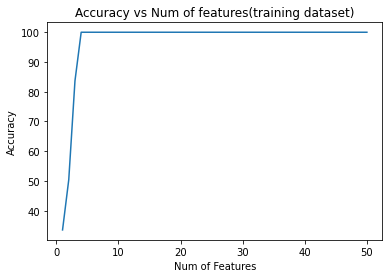

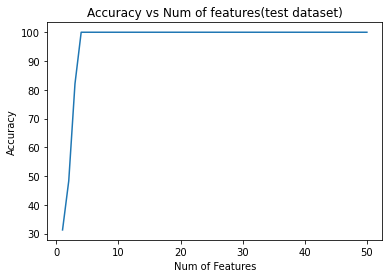

In [335]:
accuracy_list_first_artificial_train_C45 = [33.5375, 50.4, 83.65, 100, 100, 100, 100, 100, 100, 100, 
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
num_features_first_artificial_train_C45 = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,20,
               21,22,23,24,25,26,27,28,29,30,
               31,32,33,34,35,36,37,38,39,40,
               41,42,43,44,45,46,47,48,49,50]
plt.plot(num_features_first_artificial_train_C45, accuracy_list_first_artificial_train_C45)
plt.title('Accuracy vs Num of features(training dataset)')
plt.xlabel('Num of Features')
plt.ylabel('Accuracy')
plt.show()

accuracy_list_first_artificial_test_C45 = [31.3, 48.35, 82.05, 100, 100, 100, 100, 100, 100, 100, 
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
num_features_first_artificial_test_C45 = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,20,
               21,22,23,24,25,26,27,28,29,30,
               31,32,33,34,35,36,37,38,39,40,
               41,42,43,44,45,46,47,48,49,50]
plt.plot(num_features_first_artificial_test_C45, accuracy_list_first_artificial_test_C45)
plt.title('Accuracy vs Num of features(test dataset)')
plt.xlabel('Num of Features')
plt.ylabel('Accuracy')
plt.show()

### E.Second Artificial Dataset

In [336]:
Sec_Artificial_C45 = Sec_Artificial_df.copy()
# train test dataset split
X_sec_artificial_C45 = Sec_Artificial_C45.drop("Target", axis = 1)
Y_sec_artificial_C45 = Sec_Artificial_C45["Target"]
X_train_sec_artificial_C45, X_test_sec_artificial_C45, y_train_sec_artificial_C45, y_test_sec_artificial_C45 = train_test_split(X_sec_artificial_C45, Y_sec_artificial_C45, test_size=.2, random_state = 42)
sec_artificial_train_C45 = pd.concat([X_train_sec_artificial_C45, pd.DataFrame(y_train_sec_artificial_C45)], axis=1)
sec_artificial_test_C45 = pd.concat([X_test_sec_artificial_C45, pd.DataFrame(y_test_sec_artificial_C45)], axis=1)


In [337]:
temp1 = ['Target']
for i in range(1,51):
    temp1.append(str(i))
    print(temp1)
    model = chef.fit(sec_artificial_train_C45[temp1], config = config, target_label = 'Target')
    sec_artificial_test_C45_list = sec_artificial_test_C45.values.tolist()
    sec_artificial_test_C45_predict = []
    for item in sec_artificial_test_C45_list:
        sec_artificial_test_C45_predict.append(chef.predict(model, item))
    correct = 0
    for i in range(0,2000):
        if sec_artificial_test_C45_predict[i] ==list(y_test_sec_artificial_C45)[i]:
            correct = correct + 1
    print("The accuracy for the test dataset is "+ str((correct/2000)*100)+"%.")

['Target', '1']
['1', 'Decision']
[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.27796506881713867  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  16.8875 % on  8000  instances
Labels:  ['2' '3' '4' '5' '0' '1']
Confusion matrix:  [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [1327, 1341, 1333, 1326, 1322, 1350]]
Decision  2  => Accuray:  83.4125 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
Decision  3  => Accuray:  83.2375 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
Decision  4  => Accuray:  83.3375 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
Decision  5  => Accuray:  83.425 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
Decision  0  => Accuray:  83.475 %, Precision:  100.0 %, Recall:  0.0756 %, F1:  0.1511 %
Decision  1  => Accuray:  16.8875 %, Precision:  16.8771 %, Recall:  100.0 %,

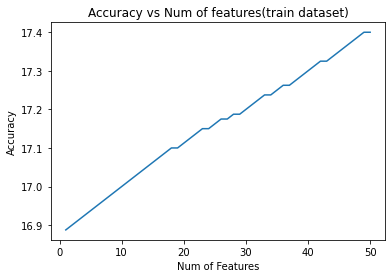

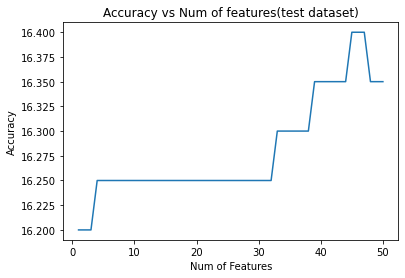

In [338]:
accuracy_list_sec_artificial_train_C45 = [16.8875, 16.9, 16.9125, 16.925, 16.9375, 16.95, 16.9625, 16.975, 16.9875, 17, 
                 17.0125, 17.025, 17.0375, 17.05, 17.0625, 17.075, 17.0875, 17.1, 17.1, 17.1125, 
                 17.125, 17.1375, 17.15, 17.15, 17.1625, 17.175, 17.175, 17.1875, 17.1875, 17.2,
                 17.2125, 17.225, 17.2375, 17.2375, 17.25, 17.2625, 17.2625, 17.275, 17.2875, 17.3,
                 17.3125, 17.325, 17.325, 17.3375, 17.35, 17.3625, 17.375, 17.3875, 17.4, 17.4]
num_features_sec_artificial_train_C45 = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,20,
               21,22,23,24,25,26,27,28,29,30,
               31,32,33,34,35,36,37,38,39,40,
               41,42,43,44,45,46,47,48,49,50]
accuracy_list_sec_artificial_test_C45 = [16.2,16.2,16.2,16.25,16.25,16.25,16.25,16.25,16.25,16.25,
               16.25,16.25,16.25,16.25,16.25,16.25,16.25,16.25,16.25,16.25,
               16.25,16.25,16.25,16.25,16.25,16.25,16.25,16.25,16.25,16.25,
               16.25,16.25,16.3,16.3,16.3,16.3,16.3,16.3,16.35,16.35,
               16.35,16.35,16.35,16.35,16.4,16.4,16.4,16.35,16.35,16.35]
num_features_sec_artificial_test_C45 = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,20,
               21,22,23,24,25,26,27,28,29,30,
               31,32,33,34,35,36,37,38,39,40,
               41,42,43,44,45,46,47,48,49,50]
plt.plot(num_features_sec_artificial_train_C45, accuracy_list_sec_artificial_train_C45)
plt.title('Accuracy vs Num of features(train dataset)')
plt.xlabel('Num of Features')
plt.ylabel('Accuracy')
plt.show()

plt.plot(num_features_sec_artificial_test_C45, accuracy_list_sec_artificial_test_C45)
plt.title('Accuracy vs Num of features(test dataset)')
plt.xlabel('Num of Features')
plt.ylabel('Accuracy')
plt.show()

In [339]:
# self created artificial adding noise data
X_sec_Artificial_extra,y_sec_Artificial_extra = make_classification(n_samples = 10000, n_features = 50, n_informative = 45, n_redundant = 5, n_repeated = 0, n_classes = 6,
                                                        n_clusters_per_class = 1, flip_y = 0.01, random_state = 42)
Sec_Artificial_df_extra = pd.DataFrame(X_sec_Artificial_extra,columns = ['1','2','3','4','5','6','7','8','9','10',
                                                                 '11','12','13','14','15','16','17','18','19','20',
                                                                 '21','22','23','24','25','26','27','28','29','30',
                                                                '31','32','33','34','35','36','37','38','39','40',
                                                                '41','42','43','44','45','46','47','48','49','50'])
Sec_Artificial_df_extra['Target'] = y_sec_Artificial_extra
Sec_Artificial_df_extra = Sec_Artificial_df_extra.astype({'Target': str})

In [340]:
config = {'algorithm': 'C4.5'}
first_artificial_model_C45 = chef.fit(Sec_Artificial_df_extra, config = config, target_label = 'Target')

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  66.69693064689636  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  17.25 % on  10000  instances
Labels:  ['5' '4' '2' '0' '1' '3']
Confusion matrix:  [[5, 0, 0, 0, 0, 0], [0, 13, 0, 0, 0, 0], [0, 0, 7, 0, 0, 0], [0, 0, 0, 13, 0, 0], [0, 0, 0, 0, 11, 0], [1661, 1654, 1646, 1652, 1662, 1676]]
Decision  5  => Accuray:  83.39 %, Precision:  100.0 %, Recall:  0.3001 %, F1:  0.5984 %
Decision  4  => Accuray:  83.46 %, Precision:  100.0 %, Recall:  0.7798 %, F1:  1.5475 %
Decision  2  => Accuray:  83.54 %, Precision:  100.0 %, Recall:  0.4235 %, F1:  0.8434 %
Decision  0  => Accuray:  83.48 %, Precision:  100.0 %, Recall:  0.7808 %, F1:  1.5495 %
Decision  1  => Accuray:  83.38 %, Precision:  100.0 %, Recall:  0.6575 %, F1:  1.3064 %
Decision  3  => Accuray:  17.25 %, Precision:  16.8425 %, Recall:  100.0 %, F1:  28.829

# CART

### A. German Credit Dataset

In [341]:
# Copy dataset
credit_df_CART = credit_df.copy()
start_time = time.time()

# Training and Testing data
X_Ger_CART = credit_df_CART.drop(['Risk'], axis=1)
y_Ger_CART = credit_df_CART['Risk']

X_train_Ger_CART, X_test_Ger_CART, y_train_Ger_CART, y_test_Ger_CART = train_test_split(X_Ger_CART, y_Ger_CART, test_size = 0.33, random_state = 42)


In [342]:
# Encoding on catagoritcal variables
encoder = ce.OrdinalEncoder(cols=['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'])

X_train_Ger_CART = encoder.fit_transform(X_train_Ger_CART)
X_test_Ger_CART = encoder.transform(X_test_Ger_CART)

##### 1. No Pruning

In [343]:
# 1. Decision Tree Classifier Using Gini; No pruning
clf_ger_CART = DecisionTreeClassifier(criterion='gini', random_state=0)

In [344]:
# Fit the dataset and predict
config = {'algorithm': 'CHAID'}
clf_ger_CART.fit(X_train_Ger_CART, y_train_Ger_CART)

DecisionTreeClassifier(random_state=0)

In [345]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = clf_ger_CART.predict(X_test_Ger_CART)
y_pred_train_gini = clf_ger_CART.predict(X_train_Ger_CART)

elapsed_time = time.time() - start_time
print(f'{elapsed_time:.2f}s elapsed during training')

0.09s elapsed during training


In [346]:
from sklearn.metrics import classification_report
print('Training set score: {:.4f}'.format(clf_ger_CART.score(X_train_Ger_CART, y_train_Ger_CART)))
print('Testing set score: {:.4f}'.format(clf_ger_CART.score(X_test_Ger_CART, y_test_Ger_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_Ger_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_Ger_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_Ger_CART, y_pred_train_gini))
print(classification_report(y_test_Ger_CART, y_pred_test_gini))


Training set score: 1.0000
Testing set score: 0.7273
Training-set accuracy score: 1.0000
Testing-set accuracy score: 0.7273
              precision    recall  f1-score   support

         bad       1.00      1.00      1.00       199
        good       1.00      1.00      1.00       471

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670

              precision    recall  f1-score   support

         bad       0.56      0.50      0.53       101
        good       0.79      0.83      0.81       229

    accuracy                           0.73       330
   macro avg       0.68      0.66      0.67       330
weighted avg       0.72      0.73      0.72       330



15

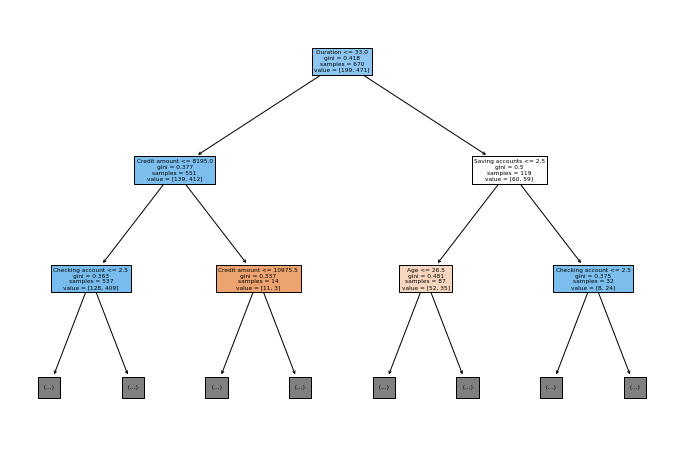

In [347]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_ger_CART.fit(X_train_Ger_CART, y_train_Ger_CART), max_depth=2, filled=True, feature_names=X_train_Ger_CART.columns)
clf_ger_CART.get_depth()


##### 2. Pruning Using max_depth

In [348]:
# 2. Prunning use max_depth
clf_ger_CART_pruning = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=0)


In [349]:
# Fit the dataset and predict
clf_ger_CART_pruning.fit(X_train_Ger_CART, y_train_Ger_CART)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [350]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = clf_ger_CART_pruning.predict(X_test_Ger_CART)
y_pred_train_gini = clf_ger_CART_pruning.predict(X_train_Ger_CART)


In [351]:
print('Training set score: {:.4f}'.format(clf_ger_CART_pruning.score(X_train_Ger_CART, y_train_Ger_CART)))
print('Testing set score: {:.4f}'.format(clf_ger_CART_pruning.score(X_test_Ger_CART, y_test_Ger_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_Ger_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_Ger_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_Ger_CART, y_pred_train_gini))
print(classification_report(y_test_Ger_CART, y_pred_test_gini))


Training set score: 0.8955
Testing set score: 0.7212
Training-set accuracy score: 0.8955
Testing-set accuracy score: 0.7212
              precision    recall  f1-score   support

         bad       0.86      0.78      0.82       199
        good       0.91      0.94      0.93       471

    accuracy                           0.90       670
   macro avg       0.88      0.86      0.87       670
weighted avg       0.89      0.90      0.89       670

              precision    recall  f1-score   support

         bad       0.56      0.44      0.49       101
        good       0.77      0.85      0.81       229

    accuracy                           0.72       330
   macro avg       0.66      0.64      0.65       330
weighted avg       0.71      0.72      0.71       330



8

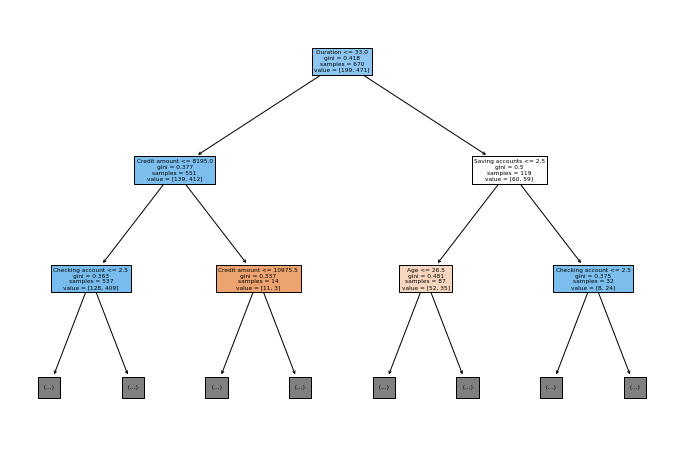

In [352]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_ger_CART_pruning.fit(X_train_Ger_CART, y_train_Ger_CART), max_depth=2, filled=True, feature_names=X_train_Ger_CART.columns)
clf_ger_CART_pruning.get_depth()


##### 3. Alpha Pruning

In [353]:
# 3. Alpha pruning
clf = DecisionTreeClassifier(criterion='gini', random_state=0)
path = clf.cost_complexity_pruning_path(X_train_Ger_CART, y_train_Ger_CART)
ccp_alphas = path.ccp_alphas


In [354]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_Ger_CART, y_train_Ger_CART)
    clfs.append(clf)
    clfs[-1].tree_.node_count, ccp_alphas[-1]

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]


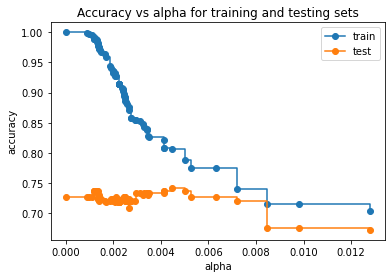

In [355]:
train_scores = [clf.score(X_train_Ger_CART, y_train_Ger_CART) for clf in clfs]
test_scores = [clf.score(X_test_Ger_CART, y_test_Ger_CART) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


In [356]:
clf_Ger_alpha = DecisionTreeClassifier(criterion='gini', random_state=0, ccp_alpha=0.004)

# Fit the dataset and predict
clf_Ger_alpha.fit(X_train_Ger_CART, y_train_Ger_CART)


DecisionTreeClassifier(ccp_alpha=0.004, random_state=0)

In [357]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = clf_Ger_alpha.predict(X_test_Ger_CART)
y_pred_train_gini = clf_Ger_alpha.predict(X_train_Ger_CART)

print('Training set score: {:.4f}'.format(clf_Ger_alpha.score(X_train_Ger_CART, y_train_Ger_CART)))
print('Testing set score: {:.4f}'.format(clf_Ger_alpha.score(X_test_Ger_CART, y_test_Ger_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_Ger_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_Ger_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_Ger_CART, y_pred_train_gini))
print(classification_report(y_test_Ger_CART, y_pred_test_gini))

Training set score: 0.8269
Testing set score: 0.7333
Training-set accuracy score: 0.8269
Testing-set accuracy score: 0.7333
              precision    recall  f1-score   support

         bad       0.81      0.54      0.65       199
        good       0.83      0.95      0.88       471

    accuracy                           0.83       670
   macro avg       0.82      0.74      0.77       670
weighted avg       0.83      0.83      0.82       670

              precision    recall  f1-score   support

         bad       0.64      0.29      0.40       101
        good       0.75      0.93      0.83       229

    accuracy                           0.73       330
   macro avg       0.70      0.61      0.61       330
weighted avg       0.72      0.73      0.70       330



8

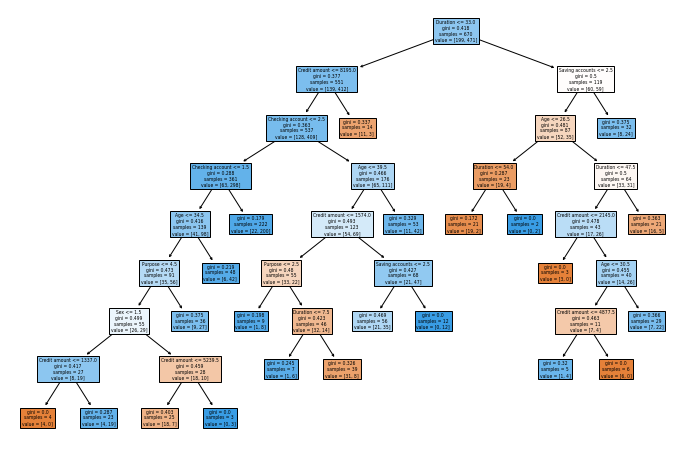

In [358]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_Ger_alpha.fit(X_train_Ger_CART, y_train_Ger_CART), filled=True, feature_names=X_train_Ger_CART.columns)
clf_ger_CART_pruning.get_depth()

### B. Wine Quality Dataset

In [359]:
# Copy dataset
wine_df_CART = wine_df.copy()
start_time = time.time()

# Training and Testing data
X_Wine_CART = wine_df_CART.drop('quality', axis = 1)
y_Wine_CART = wine_df_CART['quality']

X_train_Wine_CART, X_test_Wine_CART, y_train_Wine_CART, y_test_Wine_CART = train_test_split(X_Wine_CART, y_Wine_CART, test_size = 0.33, random_state = 42)

##### 1. No Pruning

In [360]:
# 1. Decision Tree Classifier Using Gini; No pruning
clf_wine_CART = DecisionTreeClassifier(criterion='gini', random_state=0)


In [361]:
# Fit the dataset and predict
clf_wine_CART.fit(X_train_Wine_CART, y_train_Wine_CART)


DecisionTreeClassifier(random_state=0)

In [362]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = clf_wine_CART.predict(X_test_Wine_CART)
y_pred_train_gini = clf_wine_CART.predict(X_train_Wine_CART)

elapsed_time = time.time() - start_time
print(f'{elapsed_time:.2f}s elapsed during training')

0.05s elapsed during training


In [363]:
print('Training set score: {:.4f}'.format(clf_wine_CART.score(X_train_Wine_CART, y_train_Wine_CART)))
print('Testing set score: {:.4f}'.format(clf_wine_CART.score(X_test_Wine_CART, y_test_Wine_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_Wine_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_Wine_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_Wine_CART, y_pred_train_gini))
print(classification_report(y_test_Wine_CART, y_pred_test_gini))

Training set score: 1.0000
Testing set score: 0.5663
Training-set accuracy score: 1.0000
Testing-set accuracy score: 0.5663
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00       464
           6       1.00      1.00      1.00       425
           7       1.00      1.00      1.00       129
           8       1.00      1.00      1.00        11

    accuracy                           1.00      1071
   macro avg       1.00      1.00      1.00      1071
weighted avg       1.00      1.00      1.00      1071

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.05      0.05      0.05        19
           5       0.68      0.65      0.66       217
           6       0.57      0.56      0.57       213
           7       0.42      0.53      0.47        70
        

/Users/katherinexiong/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/katherinexiong/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/katherinexiong/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


18

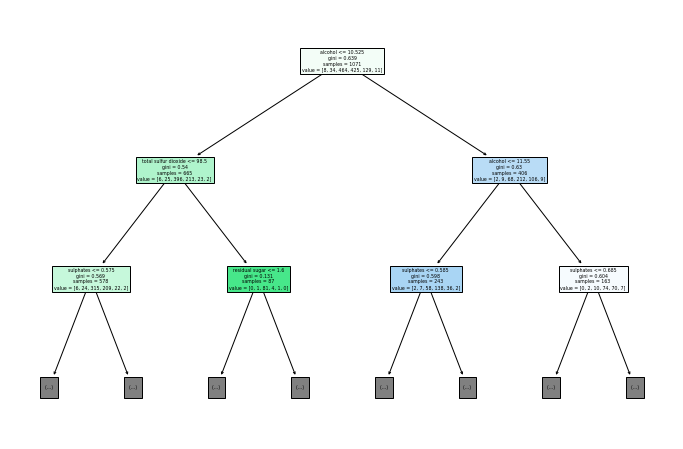

In [364]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_wine_CART.fit(X_train_Wine_CART, y_train_Wine_CART), max_depth=2, filled=True, feature_names=X_train_Wine_CART.columns) 
clf_wine_CART.get_depth()

##### 2. Pruning using max_depth

In [365]:
# 2. Prunning use max_depth
clf_wine_CART_pruning = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)


In [366]:
# Fit the dataset and predict
clf_wine_CART_pruning.fit(X_train_Wine_CART, y_train_Wine_CART)


DecisionTreeClassifier(max_depth=10, random_state=0)

In [367]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = clf_wine_CART_pruning.predict(X_test_Wine_CART)
y_pred_train_gini = clf_wine_CART_pruning.predict(X_train_Wine_CART)


In [368]:
print('Training set score: {:.4f}'.format(clf_wine_CART_pruning.score(X_train_Wine_CART, y_train_Wine_CART)))
print('Testing set score: {:.4f}'.format(clf_wine_CART_pruning.score(X_test_Wine_CART, y_test_Wine_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_Wine_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_Wine_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_Wine_CART, y_pred_train_gini))
print(classification_report(y_test_Wine_CART, y_pred_test_gini))

Training set score: 0.9085
Testing set score: 0.5795
Training-set accuracy score: 0.9085
Testing-set accuracy score: 0.5795
              precision    recall  f1-score   support

           3       0.88      0.88      0.88         8
           4       1.00      0.59      0.74        34
           5       0.89      0.94      0.92       464
           6       0.91      0.91      0.91       425
           7       0.93      0.89      0.91       129
           8       1.00      0.73      0.84        11

    accuracy                           0.91      1071
   macro avg       0.94      0.82      0.87      1071
weighted avg       0.91      0.91      0.91      1071

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.07      0.05      0.06        19
           5       0.67      0.70      0.68       217
           6       0.58      0.55      0.56       213
           7       0.46      0.53      0.49        70
        

/Users/katherinexiong/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/katherinexiong/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/katherinexiong/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10

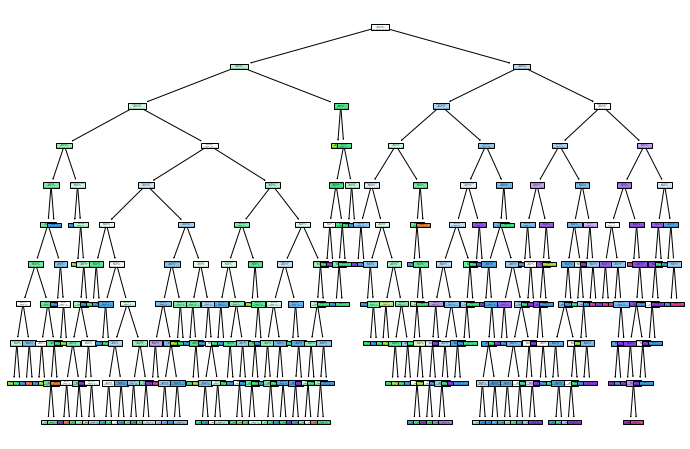

In [369]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_wine_CART_pruning.fit(X_train_Wine_CART, y_train_Wine_CART), max_depth=10, filled=True, feature_names=X_train_Wine_CART.columns) 
clf_wine_CART_pruning.get_depth()

##### 3. Alpha Pruning

In [370]:
# 3. Alpha pruning
clf_wine = DecisionTreeClassifier(criterion='gini', random_state=0)
path = clf_wine.cost_complexity_pruning_path(X_train_Wine_CART, y_train_Wine_CART)
ccp_alphas_wine = path.ccp_alphas


In [371]:
clfs_wine = []
for ccp_alpha in ccp_alphas_wine:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_Wine_CART, y_train_Wine_CART)
    clfs_wine.append(clf)
    clfs_wine[-1].tree_.node_count, ccp_alphas_wine[-1]

clfs_wine = clfs_wine[:-1]
ccp_alphas_wine = ccp_alphas_wine[:-1]


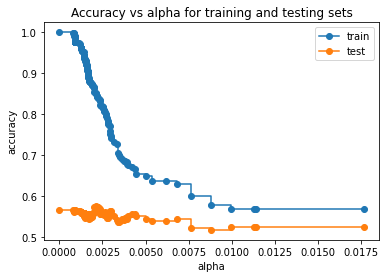

In [372]:
train_scores = [clf.score(X_train_Wine_CART, y_train_Wine_CART) for clf in clfs_wine]
test_scores = [clf.score(X_test_Wine_CART, y_test_Wine_CART) for clf in clfs_wine]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_wine, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas_wine, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [373]:
clf_Wine_alpha = DecisionTreeClassifier(criterion='gini', random_state=0, ccp_alpha=0.0025)

# Fit the dataset and predict
clf_Wine_alpha.fit(X_train_Wine_CART, y_train_Wine_CART)

DecisionTreeClassifier(ccp_alpha=0.0025, random_state=0)

In [374]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = clf_Wine_alpha.predict(X_test_Wine_CART)
y_pred_train_gini = clf_Wine_alpha.predict(X_train_Wine_CART)

print('Training set score: {:.4f}'.format(clf_Wine_alpha.score(X_train_Wine_CART, y_train_Wine_CART)))
print('Testing set score: {:.4f}'.format(clf_Wine_alpha.score(X_test_Wine_CART, y_test_Wine_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_Wine_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_Wine_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_Wine_CART, y_pred_train_gini))
print(classification_report(y_test_Wine_CART, y_pred_test_gini))

Training set score: 0.8189
Testing set score: 0.5549
Training-set accuracy score: 0.8189
Testing-set accuracy score: 0.5549
              precision    recall  f1-score   support

           3       1.00      0.25      0.40         8
           4       1.00      0.09      0.16        34
           5       0.80      0.91      0.85       464
           6       0.84      0.81      0.83       425
           7       0.82      0.78      0.80       129
           8       1.00      0.18      0.31        11

    accuracy                           0.82      1071
   macro avg       0.91      0.50      0.56      1071
weighted avg       0.83      0.82      0.81      1071

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.62      0.71      0.66       217
           6       0.53      0.51      0.52       213
           7       0.42      0.44      0.43        70
        

/Users/katherinexiong/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/katherinexiong/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/katherinexiong/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11

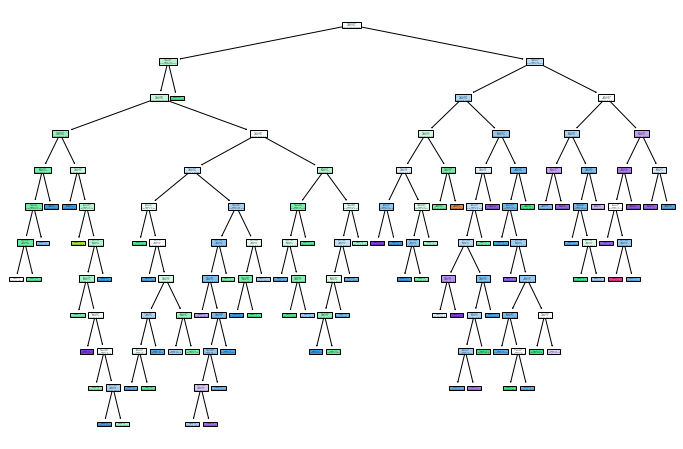

In [375]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_Wine_alpha.fit(X_train_Wine_CART, y_train_Wine_CART), filled=True)
clf_Wine_alpha.get_depth()

### C. Adult Income Dataset

In [376]:
# Copy dataset
adult_df_CART = adult_df.copy()
start_time = time.time()

adult_df_CART = adult_df_CART.dropna(axis=0)
adult_df_CART = adult_df_CART.drop(["education"], axis=1)
adult_df_CART = adult_df_CART.drop(["native-country"], axis=1)

adult_df_CART.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,<=50K


In [377]:
# Training and Testing data
X_adult_CART = adult_df_CART.drop('income', axis = 1)
y_adult_CART = adult_df_CART['income']

X_train_adult_CART, X_test_adult_CART, y_train_adult_CART, y_test_adult_CART = train_test_split(X_adult_CART, y_adult_CART, test_size = 0.33, random_state = 42)


In [378]:
# Encoding on catagoritcal variables
encoder = ce.OrdinalEncoder(cols=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender'])

X_train_adult_CART = encoder.fit_transform(X_train_adult_CART)
X_test_adult_CART = encoder.transform(X_test_adult_CART)

##### 1. No Pruning

In [379]:
# 1. Decision Tree Classifier Using Gini; No pruning
clf_adult_CART = DecisionTreeClassifier(criterion='gini', random_state=0)

In [380]:
# Fit the dataset and predict
clf_adult_CART.fit(X_train_adult_CART, y_train_adult_CART)

DecisionTreeClassifier(random_state=0)

In [381]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = clf_adult_CART.predict(X_test_adult_CART)
y_pred_train_gini = clf_adult_CART.predict(X_train_adult_CART)

elapsed_time = time.time() - start_time
print(f'{elapsed_time:.2f}s elapsed during training')

0.25s elapsed during training


In [382]:
print('Training set score: {:.4f}'.format(clf_adult_CART.score(X_train_adult_CART, y_train_adult_CART)))
print('Testing set score: {:.4f}'.format(clf_adult_CART.score(X_test_adult_CART, y_test_adult_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_adult_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_adult_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_adult_CART, y_pred_train_gini))
print(classification_report(y_test_adult_CART, y_pred_test_gini))

Training set score: 0.9999
Testing set score: 0.8013
Training-set accuracy score: 0.9999
Testing-set accuracy score: 0.8013
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     22782
        >50K       1.00      1.00      1.00      7516

    accuracy                           1.00     30298
   macro avg       1.00      1.00      1.00     30298
weighted avg       1.00      1.00      1.00     30298

              precision    recall  f1-score   support

       <=50K       0.87      0.86      0.87     11232
        >50K       0.59      0.62      0.61      3692

    accuracy                           0.80     14924
   macro avg       0.73      0.74      0.74     14924
weighted avg       0.80      0.80      0.80     14924



42

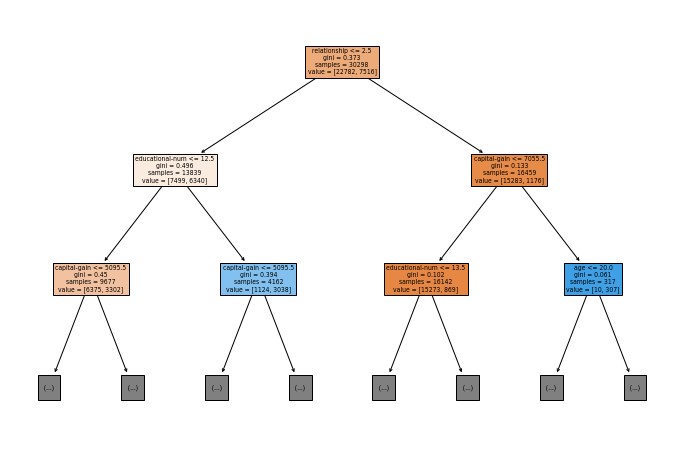

In [383]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_adult_CART.fit(X_train_adult_CART, y_train_adult_CART), max_depth=2, filled=True, feature_names=X_train_adult_CART.columns) 
clf_adult_CART.get_depth()

##### 2. Pruning using max_depth

In [384]:
# 2. Prunning use max_depth
clf_adult_CART_pruning = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=0)

In [385]:
# Fit the dataset and predict
clf_adult_CART_pruning.fit(X_train_adult_CART, y_train_adult_CART)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [386]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = clf_adult_CART_pruning.predict(X_test_adult_CART)
y_pred_train_gini = clf_adult_CART_pruning.predict(X_train_adult_CART)

In [387]:
print('Training set score: {:.4f}'.format(clf_adult_CART_pruning.score(X_train_adult_CART, y_train_adult_CART)))
print('Testing set score: {:.4f}'.format(clf_adult_CART_pruning.score(X_test_adult_CART, y_test_adult_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_adult_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_adult_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_adult_CART, y_pred_train_gini))
print(classification_report(y_test_adult_CART, y_pred_test_gini))

Training set score: 0.8572
Testing set score: 0.8543
Training-set accuracy score: 0.8572
Testing-set accuracy score: 0.8543
              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91     22782
        >50K       0.82      0.54      0.65      7516

    accuracy                           0.86     30298
   macro avg       0.84      0.75      0.78     30298
weighted avg       0.85      0.86      0.85     30298

              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91     11232
        >50K       0.82      0.53      0.64      3692

    accuracy                           0.85     14924
   macro avg       0.84      0.75      0.78     14924
weighted avg       0.85      0.85      0.84     14924



8

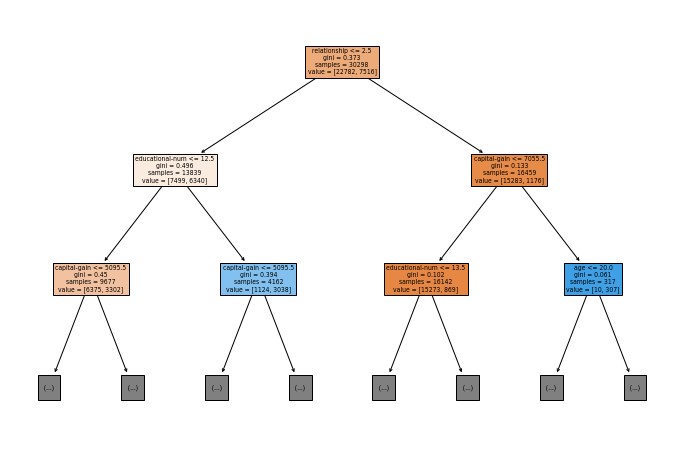

In [388]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_adult_CART_pruning.fit(X_train_adult_CART, y_train_adult_CART), max_depth=2, filled=True, feature_names=X_train_adult_CART.columns)
clf_adult_CART_pruning.get_depth()

##### 3. Alpha Pruning

In [389]:
# 3. Alpha pruning
clf_adult = DecisionTreeClassifier(criterion='gini', random_state=0)
path = clf_adult.cost_complexity_pruning_path(X_train_adult_CART, y_train_adult_CART)
ccp_alphas_adult = path.ccp_alphas

In [390]:
clfs_adult = []
for ccp_alpha in ccp_alphas_adult:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_adult_CART, y_train_adult_CART)
    clfs_adult.append(clf)
    clfs_adult[-1].tree_.node_count, ccp_alphas_adult[-1]

clfs_adult = clfs_adult[:-1]
ccp_alphas_adult = ccp_alphas_adult[:-1]

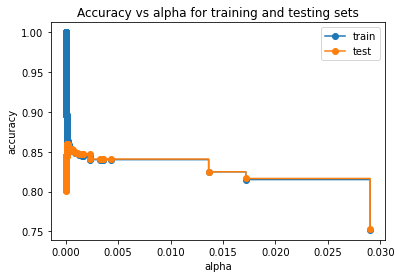

In [391]:
train_scores = [clf.score(X_train_adult_CART, y_train_adult_CART) for clf in clfs_adult]
test_scores = [clf.score(X_test_adult_CART, y_test_adult_CART) for clf in clfs_adult]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_adult, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas_adult, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [392]:
clf_adult_alpha = DecisionTreeClassifier(criterion='gini', random_state=0, ccp_alpha=0.00015)

# Fit the dataset and predict
clf_adult_alpha.fit(X_train_adult_CART, y_train_adult_CART)

DecisionTreeClassifier(ccp_alpha=0.00015, random_state=0)

In [393]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = clf_adult_alpha.predict(X_test_adult_CART)
y_pred_train_gini = clf_adult_alpha.predict(X_train_adult_CART)

print('Training set score: {:.4f}'.format(clf_adult_alpha.score(X_train_adult_CART, y_train_adult_CART)))
print('Testing set score: {:.4f}'.format(clf_adult_alpha.score(X_test_adult_CART, y_test_adult_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_adult_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_adult_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_adult_CART, y_pred_train_gini))
print(classification_report(y_test_adult_CART, y_pred_test_gini))

Training set score: 0.8643
Testing set score: 0.8588
Training-set accuracy score: 0.8643
Testing-set accuracy score: 0.8588
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     22782
        >50K       0.80      0.61      0.69      7516

    accuracy                           0.86     30298
   macro avg       0.84      0.78      0.80     30298
weighted avg       0.86      0.86      0.86     30298

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     11232
        >50K       0.78      0.59      0.68      3692

    accuracy                           0.86     14924
   macro avg       0.83      0.77      0.79     14924
weighted avg       0.85      0.86      0.85     14924



17

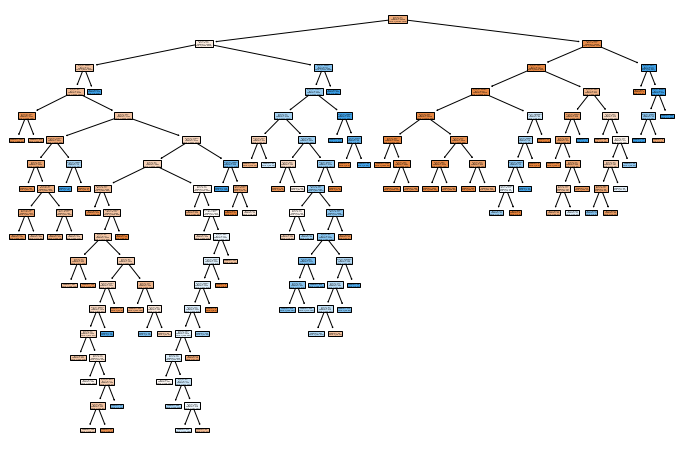

In [394]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_adult_alpha.fit(X_train_adult_CART, y_train_adult_CART), filled=True)
clf_adult_alpha.get_depth()

### D. First Artificial Dataset

In [395]:
X_train_First_CART, X_test_First_CART, y_train_First_CART, y_test_First_CART = train_test_split(X_first_Artificial, y_first_Artificial, test_size = 0.33, random_state = 42)
start_time = time.time()

##### 1. No Pruning

In [396]:
# 1. Decision Tree Classifier Using Gini; No pruning
clf_First_CART = DecisionTreeClassifier(criterion='gini', random_state=0)

In [397]:
# Fit the dataset and predict
clf_First_CART.fit(X_train_First_CART, y_train_First_CART)

DecisionTreeClassifier(random_state=0)

In [398]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = clf_First_CART.predict(X_test_First_CART)
y_pred_train_gini = clf_First_CART.predict(X_train_First_CART)

elapsed_time = time.time() - start_time
print(f'{elapsed_time:.2f}s elapsed during training')

0.15s elapsed during training


In [399]:
print('Training set score: {:.4f}'.format(clf_First_CART.score(X_train_First_CART, y_train_First_CART)))
print('Testing set score: {:.4f}'.format(clf_First_CART.score(X_test_First_CART, y_test_First_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_First_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_First_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_First_CART, y_pred_train_gini))
print(classification_report(y_test_First_CART, y_pred_test_gini))

Training set score: 1.0000
Testing set score: 1.0000
Training-set accuracy score: 1.0000
Testing-set accuracy score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1125
           1       1.00      1.00      1.00      1103
           2       1.00      1.00      1.00      1102
           3       1.00      1.00      1.00      1091
           4       1.00      1.00      1.00      1143
           5       1.00      1.00      1.00      1136

    accuracy                           1.00      6700
   macro avg       1.00      1.00      1.00      6700
weighted avg       1.00      1.00      1.00      6700

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       542
           1       1.00      1.00      1.00       564
           2       1.00      1.00      1.00       565
           3       1.00      1.00      1.00       576
           4       1.00      1.00      1.00       523
        

6

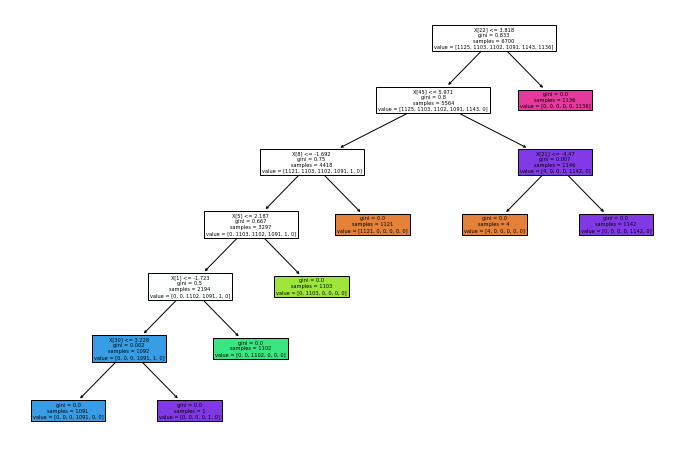

In [400]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_First_CART.fit(X_train_First_CART, y_train_First_CART), max_depth=10, filled=True) 
clf_First_CART.get_depth()

##### 2. Pruning Using Max_depth

In [401]:
# 2. Prunning use max_depth
clf_First_CART_pruning = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)

In [402]:
# Fit the dataset and predict
clf_First_CART_pruning.fit(X_train_First_CART, y_train_First_CART)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [403]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = clf_First_CART_pruning.predict(X_test_First_CART)
y_pred_train_gini = clf_First_CART_pruning.predict(X_train_First_CART)

In [404]:
print('Training set score: {:.4f}'.format(clf_First_CART_pruning.score(X_train_First_CART, y_train_First_CART)))
print('Testing set score: {:.4f}'.format(clf_First_CART_pruning.score(X_test_First_CART, y_test_First_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_First_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_First_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_First_CART, y_pred_train_gini))
print(classification_report(y_test_First_CART, y_pred_test_gini))

Training set score: 1.0000
Testing set score: 1.0000
Training-set accuracy score: 1.0000
Testing-set accuracy score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1125
           1       1.00      1.00      1.00      1103
           2       1.00      1.00      1.00      1102
           3       1.00      1.00      1.00      1091
           4       1.00      1.00      1.00      1143
           5       1.00      1.00      1.00      1136

    accuracy                           1.00      6700
   macro avg       1.00      1.00      1.00      6700
weighted avg       1.00      1.00      1.00      6700

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       542
           1       1.00      1.00      1.00       564
           2       1.00      1.00      1.00       565
           3       1.00      1.00      1.00       576
           4       1.00      1.00      1.00       523
        

6

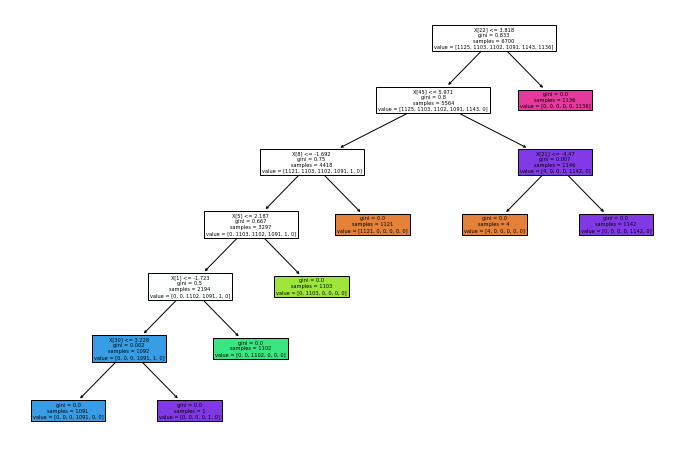

In [405]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_First_CART_pruning.fit(X_train_First_CART, y_train_First_CART), max_depth=10, filled=True) 
clf_First_CART_pruning.get_depth()

##### 3. Alpha Pruning

In [406]:
# 3. Alpha pruning
clf_First = DecisionTreeClassifier(criterion='gini', random_state=0)
path = clf_First.cost_complexity_pruning_path(X_train_First_CART, y_train_First_CART)
ccp_alphas_First = path.ccp_alphas


In [407]:
clfs_First = []
for ccp_alpha in ccp_alphas_First:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_First_CART, y_train_First_CART)
    clfs_First.append(clf)
    clfs_First[-1].tree_.node_count, ccp_alphas_First[-1]

clfs_First = clfs_First[:-1]
ccp_alphas_First = ccp_alphas_First[:-1]

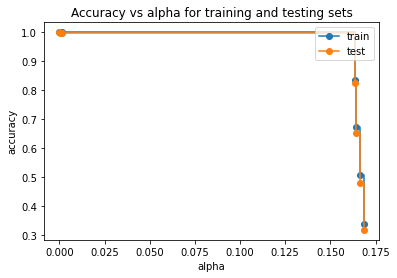

In [408]:
train_scores = [clf.score(X_train_First_CART, y_train_First_CART) for clf in clfs_First]
test_scores = [clf.score(X_test_First_CART, y_test_First_CART) for clf in clfs_First]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_First, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas_First, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [409]:
clf_First_alpha = DecisionTreeClassifier(criterion='gini', random_state=0, ccp_alpha=0)

# Fit the dataset and predict
clf_First_alpha.fit(X_train_First_CART, y_train_First_CART)

DecisionTreeClassifier(ccp_alpha=0, random_state=0)

In [410]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = clf_First_alpha.predict(X_test_First_CART)
y_pred_train_gini = clf_First_alpha.predict(X_train_First_CART)

print('Training set score: {:.4f}'.format(clf_First_alpha.score(X_train_First_CART, y_train_First_CART)))
print('Testing set score: {:.4f}'.format(clf_First_alpha.score(X_test_First_CART, y_test_First_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_First_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_First_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_First_CART, y_pred_train_gini))
print(classification_report(y_test_First_CART, y_pred_test_gini))

Training set score: 1.0000
Testing set score: 1.0000
Training-set accuracy score: 1.0000
Testing-set accuracy score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1125
           1       1.00      1.00      1.00      1103
           2       1.00      1.00      1.00      1102
           3       1.00      1.00      1.00      1091
           4       1.00      1.00      1.00      1143
           5       1.00      1.00      1.00      1136

    accuracy                           1.00      6700
   macro avg       1.00      1.00      1.00      6700
weighted avg       1.00      1.00      1.00      6700

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       542
           1       1.00      1.00      1.00       564
           2       1.00      1.00      1.00       565
           3       1.00      1.00      1.00       576
           4       1.00      1.00      1.00       523
        

6

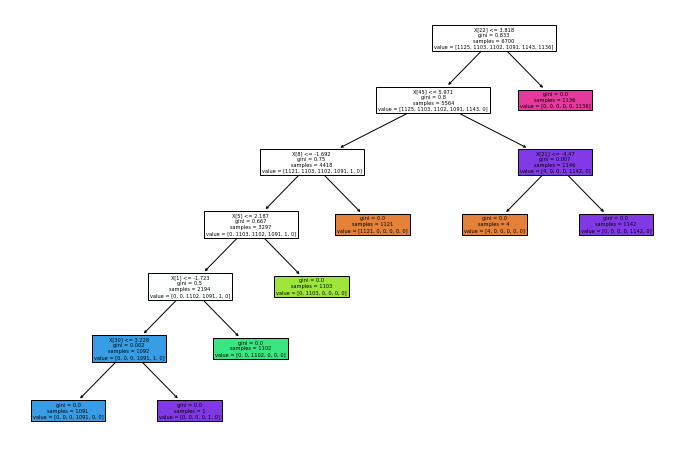

In [411]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_First_alpha.fit(X_train_First_CART, y_train_First_CART), filled=True)
clf_First_alpha.get_depth()

### E.Second Artificial Dataset

In [412]:
X_train_Sec_CART, X_test_Sec_CART, y_train_Sec_CART, y_test_Sec_CART = train_test_split(X_sec_Artificial, y_sec_Artificial, test_size = 0.33, random_state = 42)
start_time = time.time()

##### 1. No Pruning

In [413]:
# 1. Decision Tree Classifier Using Gini; No pruning
clf_Sec_CART = DecisionTreeClassifier(criterion='gini', random_state=0)

In [414]:
# Fit the dataset and predict
clf_Sec_CART.fit(X_train_Sec_CART, y_train_Sec_CART)

DecisionTreeClassifier(random_state=0)

In [415]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = clf_Sec_CART.predict(X_test_Sec_CART)
y_pred_train_gini = clf_Sec_CART.predict(X_train_Sec_CART)

elapsed_time = time.time() - start_time
print(f'{elapsed_time:.2f}s elapsed during training')

0.29s elapsed during training


In [416]:
print('Training set score: {:.4f}'.format(clf_Sec_CART.score(X_train_Sec_CART, y_train_Sec_CART)))
print('Testing set score: {:.4f}'.format(clf_Sec_CART.score(X_test_Sec_CART, y_test_Sec_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_Sec_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_Sec_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_Sec_CART, y_pred_train_gini))
print(classification_report(y_test_Sec_CART, y_pred_test_gini))

Training set score: 1.0000
Testing set score: 0.3297
Training-set accuracy score: 1.0000
Testing-set accuracy score: 0.3297
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1079
           1       1.00      1.00      1.00      1136
           2       1.00      1.00      1.00      1122
           3       1.00      1.00      1.00      1139
           4       1.00      1.00      1.00      1118
           5       1.00      1.00      1.00      1106

    accuracy                           1.00      6700
   macro avg       1.00      1.00      1.00      6700
weighted avg       1.00      1.00      1.00      6700

              precision    recall  f1-score   support

           0       0.33      0.35      0.34       571
           1       0.35      0.37      0.36       539
           2       0.31      0.28      0.30       531
           3       0.33      0.34      0.34       550
           4       0.35      0.35      0.35       550
        

21

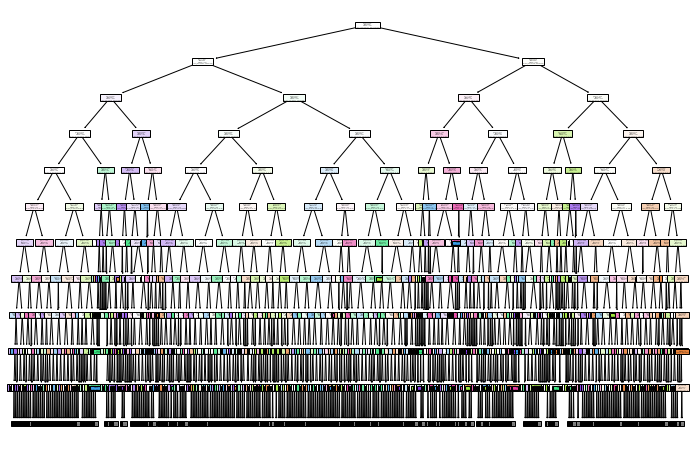

In [417]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_Sec_CART.fit(X_train_Sec_CART, y_train_Sec_CART), max_depth=10, filled=True) 
clf_Sec_CART.get_depth()

##### 2. Pruning Using max_depth

In [418]:
# 2. Prunning use max_depth
clf_Sec_CART_pruning = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=0)

In [419]:
# Fit the dataset and predict
clf_Sec_CART_pruning.fit(X_train_Sec_CART, y_train_Sec_CART)

DecisionTreeClassifier(max_depth=9, random_state=0)

In [420]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = clf_Sec_CART_pruning.predict(X_test_Sec_CART)
y_pred_train_gini = clf_Sec_CART_pruning.predict(X_train_Sec_CART)

In [421]:
print('Training set score: {:.4f}'.format(clf_Sec_CART_pruning.score(X_train_Sec_CART, y_train_Sec_CART)))
print('Testing set score: {:.4f}'.format(clf_Sec_CART_pruning.score(X_test_Sec_CART, y_test_Sec_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_Sec_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_Sec_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_Sec_CART, y_pred_train_gini))
print(classification_report(y_test_Sec_CART, y_pred_test_gini))

Training set score: 0.6133
Testing set score: 0.3536
Training-set accuracy score: 0.6133
Testing-set accuracy score: 0.3536
              precision    recall  f1-score   support

           0       0.58      0.63      0.61      1079
           1       0.63      0.63      0.63      1136
           2       0.63      0.59      0.61      1122
           3       0.59      0.61      0.60      1139
           4       0.60      0.64      0.62      1118
           5       0.66      0.57      0.61      1106

    accuracy                           0.61      6700
   macro avg       0.62      0.61      0.61      6700
weighted avg       0.62      0.61      0.61      6700

              precision    recall  f1-score   support

           0       0.38      0.40      0.39       571
           1       0.37      0.39      0.38       539
           2       0.35      0.31      0.33       531
           3       0.32      0.35      0.33       550
           4       0.37      0.40      0.39       550
        

9

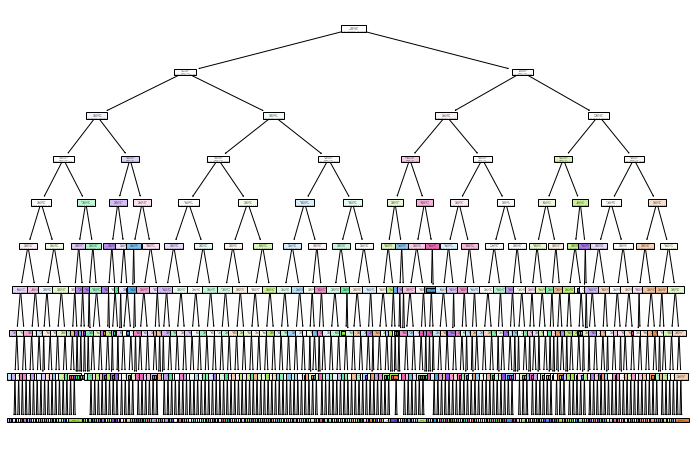

In [422]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_Sec_CART_pruning.fit(X_train_Sec_CART, y_train_Sec_CART), max_depth=10, filled=True) 
clf_Sec_CART_pruning.get_depth()

##### 3. Alpha Pruning

In [423]:
# 3. Alpha pruning
clf_Sec = DecisionTreeClassifier(criterion='gini', random_state=0)
path = clf_Sec.cost_complexity_pruning_path(X_train_Sec_CART, y_train_Sec_CART)
ccp_alphas_Sec = path.ccp_alphas

In [424]:
clfs_Sec = []
for ccp_alpha in ccp_alphas_Sec:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_Sec_CART, y_train_Sec_CART)
    clfs_Sec.append(clf)
    clfs_Sec[-1].tree_.node_count, ccp_alphas_Sec[-1]

clfs_Sec = clfs_Sec[:-1]
ccp_alphas_Sec = ccp_alphas_Sec[:-1]

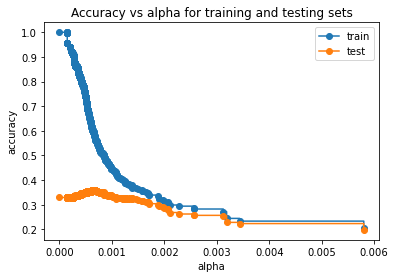

In [425]:
train_scores = [clf.score(X_train_Sec_CART, y_train_Sec_CART) for clf in clfs_Sec]
test_scores = [clf.score(X_test_Sec_CART, y_test_Sec_CART) for clf in clfs_Sec]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_Sec, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas_Sec, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [426]:
ccp_alphas_Sec = DecisionTreeClassifier(criterion='gini', random_state=0, ccp_alpha=0.0006)

# Fit the dataset and predict
ccp_alphas_Sec.fit(X_train_Sec_CART, y_train_Sec_CART)

DecisionTreeClassifier(ccp_alpha=0.0006, random_state=0)

In [427]:
# Applying Decision Tree on Training and Testing Data
y_pred_test_gini = ccp_alphas_Sec.predict(X_test_Sec_CART)
y_pred_train_gini = ccp_alphas_Sec.predict(X_train_Sec_CART)

print('Training set score: {:.4f}'.format(ccp_alphas_Sec.score(X_train_Sec_CART, y_train_Sec_CART)))
print('Testing set score: {:.4f}'.format(ccp_alphas_Sec.score(X_test_Sec_CART, y_test_Sec_CART)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_Sec_CART, y_pred_train_gini)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_Sec_CART, y_pred_test_gini)))

# more specific
print(classification_report(y_train_Sec_CART, y_pred_train_gini))
print(classification_report(y_test_Sec_CART, y_pred_test_gini))

Training set score: 0.6288
Testing set score: 0.3548
Training-set accuracy score: 0.6288
Testing-set accuracy score: 0.3548
              precision    recall  f1-score   support

           0       0.62      0.65      0.64      1079
           1       0.61      0.65      0.63      1136
           2       0.62      0.62      0.62      1122
           3       0.61      0.66      0.63      1139
           4       0.69      0.60      0.64      1118
           5       0.63      0.59      0.61      1106

    accuracy                           0.63      6700
   macro avg       0.63      0.63      0.63      6700
weighted avg       0.63      0.63      0.63      6700

              precision    recall  f1-score   support

           0       0.37      0.40      0.38       571
           1       0.35      0.41      0.38       539
           2       0.36      0.32      0.34       531
           3       0.31      0.35      0.33       550
           4       0.40      0.35      0.37       550
        

14

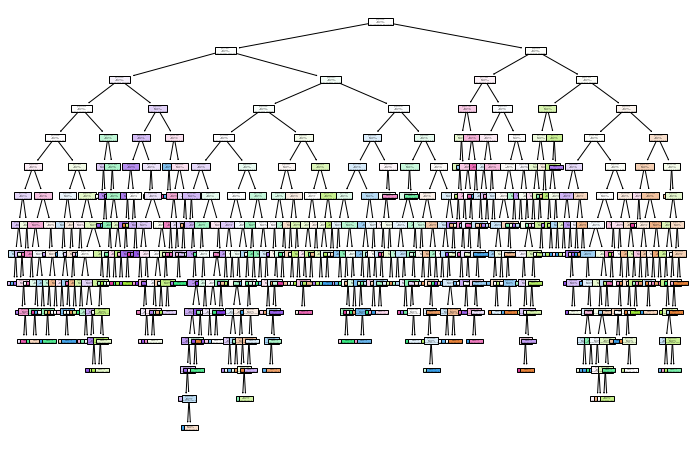

In [428]:
plt.figure(figsize=(12,8))
tree.plot_tree(ccp_alphas_Sec.fit(X_train_Sec_CART, y_train_Sec_CART), filled=True)
ccp_alphas_Sec.get_depth()

# CHAID

### A. German Credit Dataset

In [429]:
credit_df_CAHID = credit_df.copy()
credit_df_X = credit_df_CAHID.drop("Risk", axis = 1)
credit_df_Y = credit_df_CAHID["Risk"]
credit_df_X_train, credit_df_X_test, credit_df_y_train, credit_df_y_test = train_test_split(credit_df_X, credit_df_Y, test_size=.2, random_state = 31)
credit_df_train = pd.concat([credit_df_X_train, pd.DataFrame(credit_df_y_train)], axis=1)
config = {'algorithm': 'CHAID'}
credit_model_CHAID = chef.fit(credit_df_train, config = config, target_label = 'Risk')
credit_df_test_list = credit_df_X_test.values.tolist()
credit_df_test_pre = []
for item in credit_df_test_list:
    credit_df_test_pre.append(chef.predict(credit_model_CHAID, item))
correct = 0
for i in range(0,200):
    if credit_df_test_pre[i] == list(credit_df_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/200)*100)+"%.")

[INFO]:  4 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  9.340415954589844  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  82.25 % on  800  instances
Labels:  ['bad' 'good']
Confusion matrix:  [[164, 71], [71, 494]]
Precision:  69.7872 %, Recall:  69.7872 %, F1:  69.7872 %
The accuracy for the test dataset is 62.0%.


Dropping missing values:

In [6]:
credit_df_CAHID = credit_df.dropna().copy()
credit_df_X = credit_df_CAHID.drop("Risk", axis = 1)
credit_df_Y = credit_df_CAHID["Risk"]
credit_df_X_train, credit_df_X_test, credit_df_y_train, credit_df_y_test = train_test_split(credit_df_X, credit_df_Y, test_size=.2, random_state = 31)
credit_df_train = pd.concat([credit_df_X_train, pd.DataFrame(credit_df_y_train)], axis=1)
config = {'algorithm': 'CHAID'}
credit_model_CHAID = chef.fit(credit_df_train, config = config, target_label = 'Risk')
credit_df_test_list = credit_df_X_test.values.tolist()
credit_df_test_pre = []
for item in credit_df_test_list:
    credit_df_test_pre.append(chef.predict(credit_model_CHAID, item))
correct = 0
for i in range(0,104):
    if credit_df_test_pre[i] == list(credit_df_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/104)*100)+"%.")

[INFO]:  4 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  3.9866318702697754  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  88.00959232613909 % on  417  instances
Labels:  ['good' 'bad']
Confusion matrix:  [[218, 34], [16, 149]]
Precision:  86.5079 %, Recall:  93.1624 %, F1:  89.7119 %
The accuracy for the test dataset is 57.692307692307686%.


### B. Wine Quality Dataset

In [431]:
wine_df_CHAID = wine_df.copy()
wine_df_CHAID = wine_df_CHAID.astype(str)
wine_df_X = wine_df_CHAID.drop("quality", axis = 1)
wine_df_Y = wine_df_CHAID["quality"]
wine_df_X_train, wine_df_X_test, wine_df_y_train, wine_df_y_test = train_test_split(wine_df_X, wine_df_Y, test_size=.2, random_state = 42)
wine_df_train = pd.concat([wine_df_X_train, pd.DataFrame(wine_df_y_train)], axis=1)
config = {'algorithm': 'CHAID'}
wine_model_train = chef.fit(wine_df_train, config = config, target_label = 'quality')
wine_test_list = wine_df_X_test.values.tolist()
wine_test_pre = []
for item in wine_test_list:
    wine_test_pre.append(chef.predict(wine_model_train, item))
correct = 0
for i in range(0,320):
    if wine_test_pre[i] ==list(wine_df_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/320)*100)+"%.")

[INFO]:  4 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  93.00303983688354  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  1279  instances
Labels:  ['6' '5' '4' '7' '8' '3']
Confusion matrix:  [[506, 0, 0, 0, 0, 0], [0, 551, 0, 0, 0, 0], [0, 0, 43, 0, 0, 0], [0, 0, 0, 157, 0, 0], [0, 0, 0, 0, 13, 0], [0, 0, 0, 0, 0, 9]]
Decision  6  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  5  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  4  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  7  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  8  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  3  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
The accuracy for the te

### C. Adult Income Dataset

In [432]:
adult_df_CHAID = adult_df.copy()
adult_df_CHAID_sample = adult_df_CHAID.sample(n=10000, random_state = 42)
adult_df_X = adult_df_CHAID_sample.drop("income", axis = 1)
adult_df_Y = adult_df_CHAID_sample["income"]
adult_df_X_train, adult_df_X_test, adult_df_y_train, adult_df_y_test = train_test_split(adult_df_X, adult_df_Y, test_size=.2, random_state = 42)
adult_df_train = pd.concat([adult_df_X_train, pd.DataFrame(adult_df_y_train)], axis=1)
config = {'algorithm': 'CHAID'}
adult_df_model_train = chef.fit(adult_df_train, config = config, target_label = 'income')
adult_df_test_list = adult_df_X_test.values.tolist()
adult_df_test_pre = []
for item in adult_df_test_list:
    adult_df_test_pre.append(chef.predict(adult_df_model_train, item))
correct = 0
for i in range(0,2000):
    if adult_df_test_pre[i] ==list(adult_df_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/2000)*100)+"%.")

[INFO]:  4 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  305.8640239238739  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  94.4 % on  8000  instances
Labels:  ['<=50K' '>50K']
Confusion matrix:  [[5945, 281], [167, 1607]]
Precision:  95.4867 %, Recall:  97.2677 %, F1:  96.369 %
The accuracy for the test dataset is 80.4%.


Dropping missing values:

In [433]:
adult_df_CHAID = adult_df.dropna().copy()
adult_df_CHAID_sample = adult_df_CHAID.sample(n=10000, random_state = 42)
adult_df_X = adult_df_CHAID_sample.drop("income", axis = 1)
adult_df_Y = adult_df_CHAID_sample["income"]
adult_df_X_train, adult_df_X_test, adult_df_y_train, adult_df_y_test = train_test_split(adult_df_X, adult_df_Y, test_size=.2, random_state = 42)
adult_df_train = pd.concat([adult_df_X_train, pd.DataFrame(adult_df_y_train)], axis=1)
config = {'algorithm': 'CHAID'}
adult_df_model_train = chef.fit(adult_df_train, config = config, target_label = 'income')
adult_df_test_list = adult_df_X_test.values.tolist()
adult_df_test_pre = []
for item in adult_df_test_list:
    adult_df_test_pre.append(chef.predict(adult_df_model_train, item))
correct = 0
for i in range(0,2000):
    if adult_df_test_pre[i] ==list(adult_df_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/2000)*100)+"%.")

[INFO]:  4 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  329.8116543292999  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  94.8125 % on  8000  instances
Labels:  ['<=50K' '>50K']
Confusion matrix:  [[5941, 290], [125, 1644]]
Precision:  95.3459 %, Recall:  97.9393 %, F1:  96.6252 %
The accuracy for the test dataset is 79.45%.


### D. First Artificial Dataset

In [434]:
First_Artificial_df_CHAID = First_Artificial_df.copy()
CHAID_X = First_Artificial_df_CHAID.drop("Target", axis = 1)
CHAID_Y = First_Artificial_df_CHAID["Target"]
CHAID_X_train, CHAID_X_test, CHAID_y_train, CHAID_y_test = train_test_split(CHAID_X, CHAID_Y, test_size=.2, random_state = 42)
first_artificial_train_CHAID = pd.concat([CHAID_X_train, pd.DataFrame(CHAID_y_train)], axis=1)
config = {'algorithm': 'CHAID'}
first_artificial_model_CHAID = chef.fit(first_artificial_train_CHAID, config = config, target_label = 'Target')
first_test_list_CHAID = CHAID_X_test.values.tolist()
first_test_pre = []
for item in first_test_list_CHAID:
    first_test_pre.append(chef.predict(first_artificial_model_CHAID, item))
correct = 0
for i in range(0,2000):
    if first_test_pre[i] ==list(CHAID_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/2000)*100)+"%.")

[INFO]:  4 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  6.338815927505493  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  8000  instances
Labels:  ['1' '2' '0' '4' '5' '3']
Confusion matrix:  [[1327, 0, 0, 0, 0, 0], [0, 1315, 0, 0, 0, 0], [0, 0, 1344, 0, 0, 0], [0, 0, 0, 1362, 0, 0], [0, 0, 0, 0, 1344, 0], [0, 0, 0, 0, 0, 1308]]
Decision  1  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  2  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  0  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  4  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  5  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  3  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
The accuracy 

### E.Second Artificial Dataset

In [435]:
Sec_Artificial_df_CHAID = Sec_Artificial_df.copy()
CHAID_X = Sec_Artificial_df_CHAID.drop("Target", axis = 1)
CHAID_Y = Sec_Artificial_df_CHAID["Target"]
CHAID_X_train, CHAID_X_test, CHAID_y_train, CHAID_y_test = train_test_split(CHAID_X, CHAID_Y, test_size=.2, random_state = 42)
sec_train_CHAID = pd.concat([CHAID_X_train, pd.DataFrame(CHAID_y_train)], axis=1)
config = {'algorithm': 'CHAID'}
sec_model_train_CHAID = chef.fit(sec_train_CHAID, config = config, target_label = 'Target')
sec_test_list = CHAID_X_test.values.tolist()
sec_test_pre = []
for item in sec_test_list:
    sec_test_pre.append(chef.predict(sec_model_train_CHAID, item))
correct = 0
for i in range(0,2000):
    if sec_test_pre[i] ==list(CHAID_y_test)[i]:
        correct = correct + 1
print("The accuracy for the test dataset is "+ str((correct/2000)*100)+"%.")

[INFO]:  4 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  610.5549819469452  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  8000  instances
Labels:  ['2' '3' '4' '5' '0' '1']
Confusion matrix:  [[1327, 0, 0, 0, 0, 0], [0, 1341, 0, 0, 0, 0], [0, 0, 1333, 0, 0, 0], [0, 0, 0, 1326, 0, 0], [0, 0, 0, 0, 1323, 0], [0, 0, 0, 0, 0, 1350]]
Decision  2  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  3  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  4  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  5  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  0  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  1  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
The accuracy 